# PRACTICA MACHINE LEARNING Eva Esquivias

## Objetivo
El objetivo de la práctica es simple: abordar un problema de Machine Learning realista siguiendo la metodología y buenas prácticas explicadas durante las clases teóricas
## Conjunto de datos
El conjunto de datos escogido es [éste](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets), extraído de Airbnb mediante técnicas de scraping. Dentro de las opciones recomiendo utilizar el extract (“Only the 14780 selected records”), ya que minimiza el tiempo de ejecución y evita problemas de memoria en equipos con menos prestaciones.
## Tarea
Es un problema de regresión: tenéis que predecir el precio del airbnb utilizando los datos disponibles. Se valorará:
    • Generación de nuevas características a partir de las existentes
    • Codificación de variables
    • Análisis exploratorio
    • Selección y evaluación del modelo
    • Comparativa de distintos algoritmos    
## Modo de entrega
Hay que realizar la práctica en Python y subirla en un repositorio a GitLab. No basta con subir el código; hay que explicar lo que se ha hecho de forma suficientemente detallada, preferiblemente con gráficas. La estructura del proyecto es indiferente, puede ser en un archivo .py o en cuadernos de Jupyter .ipynb.

## REALIZACIÓN DE LA PRÁCTICA


In [1]:
#primero cargar las librerías necesarias para trabajar. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline 

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

### Adquisición de los datos

In [2]:
#cargar datos: 
#Separo el dataset tal cual en 2, train y test y los guardo en dos csv diferentes.
#Por último, cargo train para trabajar sobre ese conjunto de datos en toda la parte de análisis y limpieza de datos


from sklearn.model_selection import train_test_split

full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 


Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


In [3]:
df_train = pd.read_csv('./train.csv', sep=';', decimal='.')

### Análisis Exploratorio del dataframe (train). Preparación de los datos:

Al acceder al link en el que se encuentran los datos propuestos para la práctica, observo que el dataset que se nos propone aparece filtrado por Madrid: 

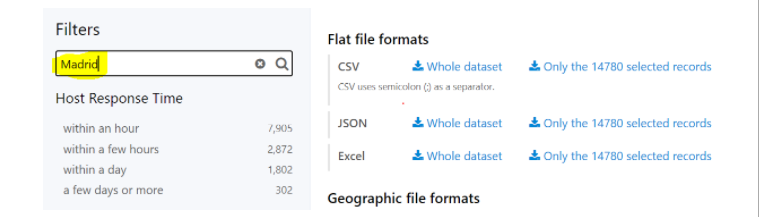


Aunque no se especifica en el objetivo de la práctica que se trata de una estimación para Madrid, en este caso, considero que se puede aclarar para los usos posteriores por parte de negocio del modelo que es una estimación únicamente válida para Madrid (si no, no estaría prefiltrado) y acotar el campo de actuación. Si nos pidieran otra ciudad, habría que empezar por una extracción sin pre-filtrar. 

Decido empezar por confirmar que efectivamente todos los apartamentos cumplen este requisito previo y, puesto que no aportarían valor diferenciador, limpiar las columnas de ciudad, country code y country.


In [4]:
df_train.City.value_counts()
#compruebo que hay valores de otras ciudades. me quedo con los que en city incluye Mad.

Madrid             10567
Barcelona            235
London               104
Paris                 85
Palma                 44
                   ...  
Templeogue             1
Sa Garriga             1
Etterbeek              1
Chelsea, London        1
Brunswick              1
Name: City, Length: 222, dtype: int64

In [5]:
df_train=df_train[df_train['City'].str.contains('Mad', na=False, regex=False)]

print(df_train.shape)

(10587, 89)


In [6]:
#compruebo que los apartamentos seleccionados corresponden a Madrid
print(df_train.City.value_counts())

Madrid                                 10567
Madrid, Comunidad de Madrid, ES           14
Madrid, Comunidad de Madrid, ESPANA        1
Aravaca (Madrid)                           1
Madri                                      1
Madid                                      1
Delicias-Madrid                            1
Chueca, Madrid                             1
Name: City, dtype: int64


In [7]:
#Una vez definido el objetivo a Madrid procedo con el análisis inicial del dataframe:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(df_train.shape)
print(type(df_train))

(10587, 89)
<class 'pandas.core.frame.DataFrame'>


In [8]:
df_train.describe() #detecto posibles outliers..revisar más adelante

ID     Scrape ID       Host ID  Host Response Rate  \
count  1.058700e+04  1.058700e+04  1.058700e+04         9272.000000   
mean   1.036923e+07  2.017041e+13  3.708589e+07           94.823123   
std    5.515187e+06  4.343955e+00  3.419069e+07           15.270713   
min    1.986400e+04  2.017041e+13  1.745300e+04            0.000000   
25%    5.782046e+06  2.017041e+13  7.725116e+06          100.000000   
50%    1.144791e+07  2.017041e+13  2.709572e+07          100.000000   
75%    1.533352e+07  2.017041e+13  5.624584e+07          100.000000   
max    1.810984e+07  2.017041e+13  1.247534e+08          100.000000   

       Host Listings Count  Host Total Listings Count      Latitude  \
count         10584.000000               10584.000000  10587.000000   
mean              9.978080                   9.978080     40.420421   
std              27.943702                  27.943702      0.019826   
min               0.000000                   0.000000     40.332908   
25%               1.000000                   1.000000     40.410078   
50%               2.000000                   2.000000     40.418458   
75%               5.000000                   5.000000     40.427683   
max             265.000000                 265.000000     40.514247   

          Longitude  Accommodates     Bathrooms      Bedrooms          Beds  \
count  10587.000000  10587.000000  10547.000000  10569.000000  10550.000000   
mean      -3.697112      3.186927      1.256613      1.294919      1.991943   
std        0.023324      1.988800      0.607785      0.832700      1.529013   
min       -3.835498      1.000000      0.000000      0.000000      1.000000   
25%       -3.707766      2.000000      1.000000      1.000000      1.000000   
50%       -3.701568      2.000000      1.000000      1.000000      1.000000   
75%       -3.693869      4.000000      1.000000      2.000000      2.000000   
max       -3.575142     16.000000      8.000000     10.000000     16.000000   

       Square Feet         Price  Weekly Price  Monthly Price  \
count   414.000000  10579.000000   2701.000000    2675.000000   
mean    374.359903     66.144532    370.594965    1355.460935   
std     556.612831     56.128824    190.673746    1001.112307   
min       0.000000      9.000000     70.000000     250.000000   
25%       0.000000     31.000000    210.000000     700.000000   
50%      93.500000     52.000000    350.000000    1200.000000   
75%     646.000000     80.000000    495.000000    1700.000000   
max    5167.000000    875.000000    999.000000   25000.000000   

       Security Deposit  Cleaning Fee  Guests Included  Extra People  \
count       4554.000000   6290.000000     10587.000000  10587.000000   
mean         183.891963     30.008585         1.569189      7.424105   
std          110.571392     27.086000         1.071859     10.613567   
min           70.000000      5.000000         1.000000      0.000000   
25%          100.000000     15.000000         1.000000      0.000000   
50%          150.000000     25.000000         1.000000      0.000000   
75%          200.000000     35.000000         2.000000     14.000000   
max          990.000000    500.000000        16.000000    276.000000   

       Minimum Nights  Maximum Nights  Availability 30  Availability 60  \
count    10587.000000    10587.000000     10587.000000     10587.000000   
mean         3.089544      976.786814         8.714650        22.845565   
std         14.118440     9919.348401         9.073013        19.509662   
min          1.000000        1.000000         0.000000         0.000000   
25%          1.000000      365.000000         0.000000         5.000000   
50%          2.000000     1125.000000         6.000000        20.000000   
75%          3.000000     1125.000000        13.000000        38.000000   
max       1125.000000  1000000.000000        30.000000        60.000000   

       Availability 90  Availability 365  Number of Reviews  \
count     10587.000000      10587.000000       1058

In [9]:
#con dtypes o info veo el tipo de las variables para ver qué tengo que codificar más adelante. info además me da los no nulos por variable. 
print(df_train.info())
#print(df_train.dtypes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10587 entries, 0 to 11823
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              10587 non-null  int64  
 1   Listing Url                     10587 non-null  object 
 2   Scrape ID                       10587 non-null  int64  
 3   Last Scraped                    10587 non-null  object 
 4   Name                            10587 non-null  object 
 5   Summary                         10198 non-null  object 
 6   Space                           7744 non-null   object 
 7   Description                     10581 non-null  object 
 8   Experiences Offered             10587 non-null  object 
 9   Neighborhood Overview           6630 non-null   object 
 10  Notes                           4047 non-null   object 
 11  Transit                         6585 non-null   object 
 12  Access                          

In [10]:
df_train.head().T

0  \
ID                                                                        5994463   
Listing Url                                  https://www.airbnb.com/rooms/5994463   
Scrape ID                                                          20170407214119   
Last Scraped                                                           2017-04-08   
Name                                             PISO ATOCHA- FLAT NEAR ATOCHA  .   
Summary                         Piso recién reformado cómoda habitación con ba...   
Space                           Un piso muy cómodo en Jerónimos, una de las zo...   
Description                     Piso recién reformado cómoda habitación con ba...   
Experiences Offered                                                          none   
Neighborhood Overview           El barrio de Jeronimos es un enclave tranquilo...   
Notes                           Facilitamos guía de eventos y rutas turísticas...   
Transit                         Excelente ubicación a tan solo 5 minutos andan...   
Access                          La conexión a internet por fibra óptica 100 MB...   
Interaction                     Recibimos personalmente a nuestros huéspedes y...   
House Rules                     El apartamento se encuentra en un edificio res...   
Thumbnail Url                   https://a0.muscache.com/im/pictures/74652419/f...   
Medium Url                      https://a0.muscache.com/im/pictures/74652419/f...   
Picture Url                     https://public.opendatasoft.com/api/v2/catalog...   
XL Picture Url                  https://a0.muscache.com/im/pictures/74652419/f...   
Host ID                                                                  31124866   
Host URL                               https://www.airbnb.com/users/show/31124866   
Host Name                                                                   Inava   
Host Since                                                             2015-04-13   
Host Location                           Arroyomolinos, Comunidad de Madrid, Spain   
Host About                                                                    NaN   
Host Response Time                                             within a few hours   
Host Response Rate                                                            100   
Host Acceptance Rate                                                          NaN   
Host Thumbnail Url              https://a0.muscache.com/im/users/31124866/prof...   
Host Picture Url                https://a0.muscache.com/im/users/31124866/prof...   
Host Neighbourhood                                                      Jerónimos   
Host Listings Count                                                             2   
Host Total Listings Count                                                       2   
Host Verifications                                 email,phone,reviews,work_email   
Street                          Jerónimos, Madrid, Comunidad de Madrid 28014, ...   
Neighbourhood                                                           Jerónimos   
Neighbourhood Cleansed                                                  Jerónimos   
Neighbourhood Group Cleansed                                               Retiro   
City                                                                       Madrid   
State                                                         Comunidad de Madrid   
Zipcode                                                                     28014   
Market                                                                     Madrid   
Smart Location                                                      Madrid, Spain   
Country Code                                                                   ES   
Country                                                                     Spain   
Latitude                                                                  40.4077   
Longitude                                                                -3.68482   


Observaciones de una primera aproximación: 

Tengo 89 variables, de las cuales muchas son object y tendré que codificar si quiero incluirlas en el modelo. 

Empezaré por repasar para eliminar algunas variables que no veo útiles para aumentar la capacidad explicativa del modelo:  

- Tal y como decía al principio: variables de localización de ciudad, país, codigo de país, estado que son iguales en todos.
- variable ID: identificador individual, no aporta valor en principio si no quiero cruzar el dataframe con otro.. 
- variables con url y con texto descriptivo ya que para ser utilizados en nuestro análisis necesitarían técnicas que no domino y tal cual no nos aportan valor. 
- información sobre el host...valorar cuál puede ser interesante para estimación del precio
- variables con todo null (que veo con la funcion info() porque no van a aportar al análisis. Host Acceptance Rate, Has availability, Jurisdiction Names. 
- variables de precio semanal y mensual son redundantes..así como la disponibilidad es algo puntual medido en el momento de la extracción. valorar. 
- Neighbourhood tiene valores nulos mientras Neighbourhood Cleansed no. me quedo con el segundo. Street da poca info concreta. redundante con barrio y ciudad


...
lo veo directamente con comprobaciones en código

In [11]:
#repaso variables que sólo confirman que el apartamento está en Madrid y las pongo en la lista de variables a eliminar:
print(df_train.Country.value_counts())
print(df_train['Country Code'].value_counts())
print(df_train.State.value_counts())
print(df_train.Market.value_counts())
print(df_train['Smart Location'].value_counts()) #son variaciones de Madrid. 

#también elimino City porque todas las ciudades ahora son Madrid. 

Spain    10587
Name: Country, dtype: int64
ES    10587
Name: Country Code, dtype: int64
Comunidad de Madrid             8495
Community of Madrid             1494
Madrid                           535
España                             4
Spain                              4
madrid                             3
Communauté de Madrid               3
28                                 2
MADRID                             2
Região Autônoma de Madrid          1
Madrid capital                     1
España,Madrid                      1
Madrid, Spain                      1
Madrid España                      1
Autonome Gemeinschaft Madrid       1
Espańa                             1
Name: State, dtype: int64
Madrid                   10540
Other (International)        6
Toledo                       1
Deauville                    1
Name: Market, dtype: int64
Madrid, Spain                                 10559
Madrid, Comunidad de Madrid, ES, Spain           14
Madrid , Spain                         

In [12]:
# Variables que sumo a la lista de variables a eliminar ya que no aportan a la interpretabilidad.
print(df_train['ID'].unique().shape) #los ID son únicos, no me aportan info 
print(df_train['Scrape ID'].unique().shape) #el mismo para todos
print(df_train['Experiences Offered'].unique()) #el mismo para todos y es NONE
print(df_train['Last Scraped'].unique().shape) # no me da información al ser una única fecha para todos. 
#Se me ocurre que podría querer calcular una variación de los precios desde entonces hasta ahora para ajustar el cálculo del precio del nuevo futuro apartamento a predecir, pero creo que excede la práctica.
#Contaré como si la extracción fuera reciente y estuvieramos en 2017.  


(10587,)
(1,)
['none']
(1,)


In [13]:
#variables con pocos valores no nulos (visto en info pero confirmo): 

#host acceptance rate, has availability y jurisdiction son todos nulos, no aportan a la interpretabilidad. 
print(df_train['Host Acceptance Rate'].unique())
print(df_train['Has Availability'].unique())
print(df_train['Jurisdiction Names'].unique())

print(df_train['License'].unique().shape) #hay 192 con licencia y el resto no pone nada, se entiende que no la tienen. 
#valorar en segunda ronda convertir los nulos a 'no tiene licencia'(y codificar) por si influyera. Pero hay algunos que dice 'en proceso' y hay que hacer más limpieza. de momento elimino

print(df_train['Square Feet'].unique().shape) #son muy pocos apartamentos con metros cuadrados. valorar en una segunda ronda hacer alguna estimación. de momento elimino


[nan]
[nan]
[nan]
(192,)
(78,)


In [14]:
#Variables descriptivas de texto a eliminar ya que en este punto no voy a utilizar su info: 
#'Name', 'Summary','Space','Description','Neighborhood Overview','Notes', 'Transit','Access','Interaction','House Rules'

In [15]:
#listo las columnas con URL para borrar
df_train.filter(regex ='Url')& df_train.filter(regex='URL')

Host Picture Url  Host Thumbnail Url  Host URL  Listing Url  \
0                   NaN                 NaN       NaN          NaN   
1                   NaN                 NaN       NaN          NaN   
2                   NaN                 NaN       NaN          NaN   
3                   NaN                 NaN       NaN          NaN   
4                   NaN                 NaN       NaN          NaN   
5                   NaN                 NaN       NaN          NaN   
6                   NaN                 NaN       NaN          NaN   
7                   NaN                 NaN       NaN          NaN   
9                   NaN                 NaN       NaN          NaN   
10                  NaN                 NaN       NaN          NaN   
11                  NaN                 NaN       NaN          NaN   
12                  NaN                 NaN       NaN          NaN   
13                  NaN                 NaN       NaN          NaN   
14                  NaN                 NaN       NaN          NaN   
15                  NaN                 NaN       NaN          NaN   
16                  NaN                 NaN       NaN          NaN   
17                  NaN                 NaN       NaN          NaN   
18                  NaN                 NaN       NaN          NaN   
19                  NaN                 NaN       NaN          NaN   
20                  NaN                 NaN       NaN          NaN   
21                  NaN                 NaN       NaN          NaN   
22                  NaN                 NaN       NaN          NaN   
24                  NaN                 NaN       NaN          NaN   
25                  NaN                 NaN       NaN          NaN   
26                  NaN                 NaN       NaN          NaN   
27                  NaN                 NaN       NaN          NaN   
28                  NaN                 NaN       NaN          NaN   
29                  NaN                 NaN       NaN          NaN   
31                  NaN                 NaN       NaN          NaN   
32                  NaN                 NaN       NaN          NaN   
33                  NaN                 NaN       NaN          NaN   
34                  NaN                 NaN       NaN          NaN   
35                  NaN                 NaN       NaN          NaN   
36                  NaN                 NaN       NaN          NaN   
37                  NaN                 NaN       NaN          NaN   
38                  NaN                 NaN       NaN          NaN   
39                  NaN                 NaN       NaN          NaN   
40                  NaN                 NaN       NaN          NaN   
41                  NaN                 NaN       NaN          NaN   
42                  NaN                 NaN       NaN          NaN   
43                  NaN                 NaN       NaN          NaN   
44                  NaN                 NaN       NaN          NaN   
45                  NaN                 NaN       NaN          NaN   
47                  NaN                 NaN       NaN          NaN   
48                  NaN                 NaN       NaN          NaN   
49                  NaN                 NaN       NaN          NaN   
50                  NaN                 NaN       NaN          NaN   
51                  NaN                 NaN       NaN          NaN   
52                  NaN                 NaN       NaN          NaN   
54                  NaN                 NaN       NaN          NaN   
55                  NaN                 NaN       NaN          NaN   
56                  NaN                 NaN       NaN          NaN   
57                  NaN                 NaN       NaN          NaN   
58                  NaN                 NaN       NaN          NaN   
59                  NaN                 NaN       NaN          NaN   
60                  NaN                 NaN       NaN          NaN   
61               

In [16]:
#info del host: 

#Host since podría ser convertido a años anunciándose. antiguedad en airbnb. ver si afecta al precio. lo dejo
print(df_train['Host ID'].unique().shape) # en principio la info de id host entiendo que no afecta al precio. revisar en segunda ronda.
print(df_train['Host Name'].unique().shape) #cómo se llame el host no parece ser muy significativo. hay muchos repetidos y el número de unique no coinciden con el ID. de quedarme con algo me quedaría con ID
print(df_train['Host Location'].unique()) #podría codificarlo y ver si el valor del apartamento tiene relación con la ubicación del host. pero es poco probable y codificarlo es complicado ya que es un campo de texto libre.elimino de momento 
#En prinipio elimino host location, host about y host neighbourhood por lo mismo. 
print(df_train['Host About'].unique())
print(df_train['Host Neighbourhood'].unique())
print(df_train['Host Listings Count'].unique())
print(df_train['Host Total Listings Count'].unique() )
print(df_train['Calculated host listings count'].unique()) # estos 3 son similares y aportan información sobre el host pero no sobre la propiedad. valorar para v2. si tener más apartamentos por host afecta al precio (cosas como al ser empresa es más caro, ...??)
print(df_train['Host Verifications'].unique()) #son 178 tipos de verificación (suma de varios) del host. en principio afecta a los requisitos del host y las facilidades del alquiler pero no al precio. lo dejo para V2 


(6778,)
(2623,)
['Arroyomolinos, Comunidad de Madrid, Spain'
 'Madrid, Community of Madrid, Spain' 'Madrid, Madrid, Spain'
 'C/Monederos 5 BajoB' 'San Martín de la Vega, Comunidad de Madrid, Spain'
 'Warsaw, Masovian Voivodeship, Poland' 'ES'
 'Sucy-en-Brie, Île-de-France, France' 'SI'
 'Segovia, Castile and León, Spain' nan
 'Ávila\u200e, Castile and León, Spain'
 'Puerto La Cruz, Anzoategui, Venezuela' 'Paris, Île-de-France, France'
 'Barcelona, Catalonia, Spain' 'US' 'Pozuelo, Community of Madrid, Spain'
 'San Sebastián, Basque Country, Spain' 'Pamplona, Navarre, Spain' 'UK'
 'Zurich, Canton of Zurich, Switzerland'
 'Newark, New Jersey, United States'
 'Santiago, Santiago Metropolitan Region, Chile'
 'San Sebastián de los Reyes, Community of Madrid, Spain'
 'Pozuelo de Alarcón, Comunidad de Madrid, Spain'
 'Las Palmas, Canary Islands, Spain'
 'Villanueva de Perales, Community of Madrid, Spain' 'Piedmont, Italy'
 'Rio de Janeiro, State of Rio de Janeiro, Brazil'
 'London, England, Un

In [17]:
# Weekly Price y Monthly price también se eliminan. son redundantes a la variable target. 
#el security deposit y cleaning fee en principio se quedan.  
#valorar el cleaning fee como posible suma a la variable target antes de separar para otras versiones.

print(df_train['Host Response Time'].unique()) #lo dejo de momento. convertir
print(df_train['Host Response Rate'].unique())#lo dejo de momento.
print(df_train.Street.value_counts()) #información repetida en otras variables (barrio,Madrid, zipcode). valorar completar zipcodes de aquí en otras versiones

#Calendar last scraped se elimina, first review (ya tengo antiguedad) y last review también (podría hacer un days since last review...). 
#entre number of reviews y reviews per month me quedo con la primera. la segunda para v2
print(df_train['Number of Reviews'].value_counts())
print(df_train['Reviews per Month'].value_counts())
#Calendar Updated..dejo para segunda ronda convertir para ver si influye tenerlo actualizado?
#print(df_train['Calendar Updated'].unique())

#Barrio
#print(df_train['Neighbourhood'].unique().shape)
#print(df_train['Neighbourhood Cleansed'].unique().shape)
#print(df_train['Neighbourhood Group Cleansed'].unique().shape)
#print(df_train['Neighbourhood'].isnull().sum())
#print(df_train['Neighbourhood Cleansed'].unique())
#print(df_train.Zipcode.value_counts()) similar a neighbourhood cleansed, me quedo con el barrio y dejo zipcode para V2.

#me quedo neighbourhood cleansed puesto que no tiene valores null y con el agrupado para ver si influye más o menos que el desagrupado. 

#entre Host response time y rate veo que tienen los mismos nulos y rate ya está codificada. Como no me dan la misma info, de momento dejo las dos. 
#print(df_train['Host Response Time'].value_counts())
#print(df_train['Host Response Rate'].value_counts())

#print(df_train['Availability 365'].unique()) #los availability son información a futuro que en principio no me aporta para explicar el precio. valorar   

#geolocation veo que es combinación de latitud y longitud. podría valorar la opción de que combinados sean más importantes para el precio pero la información que me daría sería muy similar al barrio o a la calle..elimino

#El resto de variables de momento se quedan, veremos a partir de la visualización y la matriz de correlación si otras que pueden ser redundantes entre sí y eliminarse y si no, en la selección de variables. 


['within a few hours' 'within an hour' 'within a day' nan
 'a few days or more']
[100.  89.  79.  nan  94.  80.   0.  99.  90.  83.  98.  33.  86.  91.
  87.  73.  72.  75.  88.  93.  70.  96.  92.  40.  25.  64.  50.  95.
  55.  57.  97.  67.  85.  65.  69.  46.  60.  76.  24.  29.  78.  30.
  82.  20.  42.  71.  81.  61.  47.  43.  63.  26.  84.  35.  59.  56.
  77.   9.  41.  28.  68.  62.  27.  13.  74.  11.  54.]
Embajadores, Madrid, Comunidad de Madrid 28012, Spain            480
Madrid, Comunidad de Madrid 28012, Spain                         426
Madrid, Comunidad de Madrid 28004, Spain                         390
Malasaña, Madrid, Comunidad de Madrid 28004, Spain               370
La Latina, Madrid, Comunidad de Madrid 28005, Spain              369
Justicia, Madrid, Comunidad de Madrid 28004, Spain               317
Madrid, Comunidad de Madrid 28005, Spain                         276
Cortes, Madrid, Comunidad de Madrid 28014, Spain                 249
Sol, Madrid, Comunidad de 

Text(0.5, 1.0, 'Price vs Host Response Time')

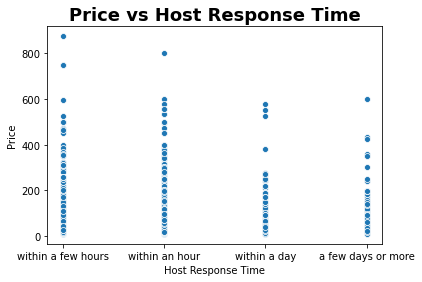

In [18]:
#represento en gráfico algunas variables: 
import seaborn as sns
sns.scatterplot(x=df_train['Host Response Time'], y=df_train['Price'])
plt.xlabel('Host Response Time')
plt.ylabel('Price')
plt.title('Price vs Host Response Time', fontsize=18, fontweight='bold')

Text(0.5, 1.0, 'Price vs Host Response Rate')

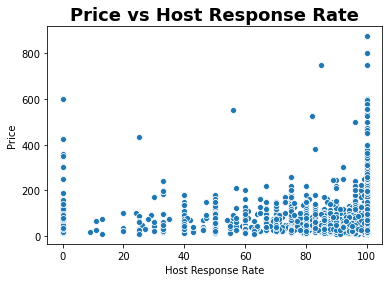

In [19]:
sns.scatterplot(x=df_train['Host Response Rate'], y=df_train['Price'])
plt.xlabel('Host Response Rate')
plt.ylabel('Price')
plt.title('Price vs Host Response Rate', fontsize=18, fontweight='bold')

['Entire home/apt' 'Shared room' 'Private room']
Entire home/apt    59.903655
Private room       38.707849
Shared room         1.388495
Name: Room Type, dtype: float64


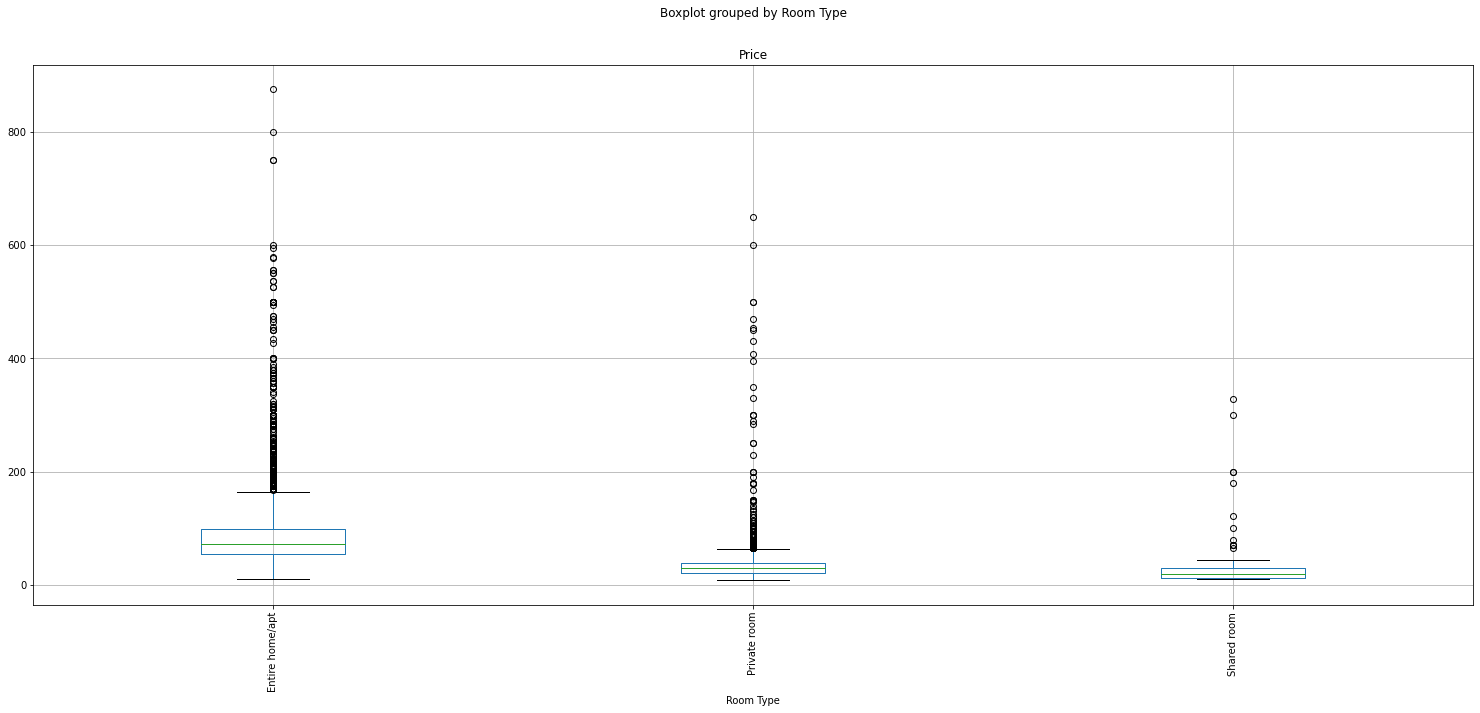

In [20]:
print(df_train['Room Type'].unique())

#miro los porcentajes porque lo que tengo que estimar es el precio de un alquiler de habitación o apartamento y me planteo quitar las habitaciones compartidas para mejorar la calidad de mis estimaciones. 
print(df_train['Room Type'].value_counts() / len(df_train)*100)

df_train.boxplot(column='Price',by='Room Type',figsize=(25,10), rot=90)


In [21]:
#Decido, previa confirmación con cliente si lo hubiera, quitar las habitaciones compartidas para mi estudio. 
#Por ahora ya tendría que explicar que mi análisis está hecho para Madrid y para habitaciones individuales o apartamentos enteros. 
df_train = df_train[df_train['Room Type'] != 'Shared room']

In [22]:
print(df_train['Room Type'].value_counts())
print(df_train.head())

Entire home/apt    6342
Private room       4098
Name: Room Type, dtype: int64
         ID                            Listing Url       Scrape ID  \
0   5994463   https://www.airbnb.com/rooms/5994463  20170407214119   
1  14136180  https://www.airbnb.com/rooms/14136180  20170407214119   
3   8809721   https://www.airbnb.com/rooms/8809721  20170407214119   
4   1162707   https://www.airbnb.com/rooms/1162707  20170407214119   
5   3425435   https://www.airbnb.com/rooms/3425435  20170407214119   

  Last Scraped                                 Name  \
0   2017-04-08     PISO ATOCHA- FLAT NEAR ATOCHA  .   
1   2017-04-08               The Palace Sol Madrid.   
3   2017-04-08  CITY CENTER JACINTO BENAVENTE ROOM4   
4   2017-04-08   NICE & BIG DOUBLE ROOM AT DOWNTOWN   
5   2017-04-08      Private room in downtown Madrid   

                                             Summary  \
0  Piso recién reformado cómoda habitación con ba...   
1  Lugares de interés: Plaza Mayor, Plaza del Sol...   
3 

Text(0, 0.5, 'Latitude')

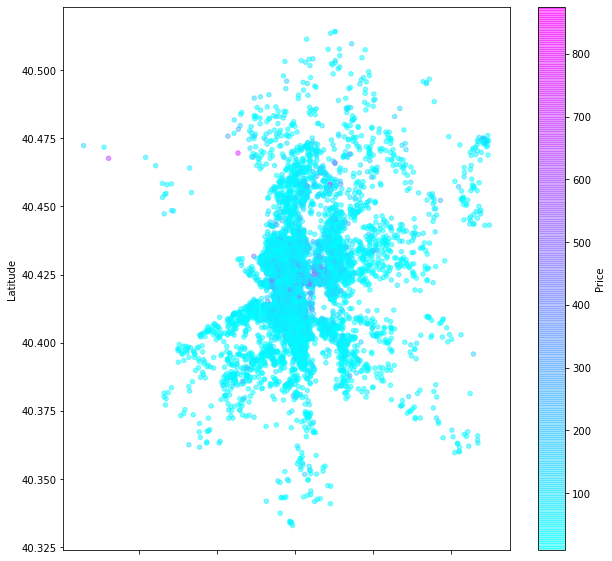

In [23]:
df_train.plot.scatter(x='Longitude',y='Latitude',c='Price',figsize=(10,10), cmap='cool',alpha=0.5) #veo algunos posibles outliers a revisar sobre todo en longitud
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [24]:
#Elimino variables analizadas hasta ahora y descartadas: 
df_train= df_train.drop(['City','Name', 'Summary','Space','Description','Neighborhood Overview','Notes', 'Transit','Access','Interaction','House Rules','Host Thumbnail Url','Host Picture Url','Host URL','Listing Url','Medium Url','Picture Url','Thumbnail Url','XL Picture Url','ID','Scrape ID','Country Code','Country','Host Acceptance Rate','Jurisdiction Names','Has Availability','Neighbourhood','Last Scraped','Host Name','Host Location','Host About','Host Neighbourhood','Host Verifications','Weekly Price','Monthly Price','Host Listings Count', 'Host ID','Market', 'Smart Location','Zipcode','Experiences Offered','State','Street','Calendar last Scraped','First Review','Last Review', 'Calendar Updated','Calculated host listings count','Host Total Listings Count', 'Reviews per Month' , 'License','Square Feet', 'Geolocation'], axis= 1)


In [25]:
df_train.describe() #se ven algunos posibles outliers, tanto en accommodates, beds,price, minimum nights..se comprobará más adelante con una visualización. 
#df_train.head().T

Host Response Rate      Latitude     Longitude  Accommodates  \
count         9148.000000  10440.000000  10440.000000  10440.000000   
mean            94.831001     40.420510     -3.697080      3.180651   
std             15.241099      0.019693      0.023276      1.960949   
min              0.000000     40.332908     -3.835498      1.000000   
25%            100.000000     40.410113     -3.707721      2.000000   
50%            100.000000     40.418483     -3.701552      2.000000   
75%            100.000000     40.427707     -3.693874      4.000000   
max            100.000000     40.514247     -3.575142     16.000000   

          Bathrooms      Bedrooms          Beds         Price  \
count  10400.000000  10422.000000  10404.000000  10432.000000   
mean       1.256058      1.299079      1.968281     66.652032   
std        0.600319      0.837810      1.471689     56.112669   
min        0.000000      0.000000      1.000000      9.000000   
25%        1.000000      1.000000      1.000000     32.000000   
50%        1.000000      1.000000      1.000000     54.500000   
75%        1.000000      2.000000      2.000000     80.000000   
max        8.000000     10.000000     16.000000    875.000000   

       Security Deposit  Cleaning Fee  Guests Included  Extra People  \
count       4531.000000    6250.00000     10440.000000  10440.000000   
mean         184.096667      30.11568         1.576628      7.401245   
std          110.723032      27.12677         1.077098     10.625446   
min           70.000000       5.00000         1.000000      0.000000   
25%          100.000000      15.00000         1.000000      0.000000   
50%          150.000000      25.00000         1.000000      0.000000   
75%          200.000000      35.00000         2.000000     14.000000   
max          990.000000     500.00000        16.000000    276.000000   

       Minimum Nights  Maximum Nights  Availability 30  Availability 60  \
count    10440.000000    10440.000000     10440.000000     10440.000000   
mean         3.111494      978.779119         8.597797        22.619444   
std         14.215529     9988.767303         8.983440        19.382292   
min          1.000000        1.000000         0.000000         0.000000   
25%          1.000000      365.000000         0.000000         4.000000   
50%          2.000000     1125.000000         6.000000        20.000000   
75%          3.000000     1125.000000        13.000000        37.000000   
max       1125.000000  1000000.000000        30.000000        60.000000   

       Availability 90  Availability 365  Number of Reviews  \
count     10440.000000      10440.000000       10440.000000   
mean         39.679693        205.366188          23.319636   
std          29.197047        126.903485          38.520344   
min           0.000000          0.000000           0.000000   
25%          12.000000         83.000000           1.000000   
50%          37.000000        247.500000           7.000000   
75%          64.000000        320.000000          28.000000   
max          90.000000        365.000000         356.000000   

       Review Scores Rating  Review Scores Accuracy  \
count           8199.000000             8183.000000   
mean              91.649226                9.414151   
std                9.004263                0.920146   
min               20.000000                2.000000   
25%               88.000000                9.000000   
50%               94.000000               10.000000   
75%               98.000000               10.000000   
max              100.000000               10.000000   

       Review Scores Cleanliness  Review Scores Checkin  \
count                8188.000000            8177.000000   
mean                    9.327430               9.630549   
std                     0.995726               0.785205   
min                     2.000000               2.000000   
25%                     9.000000               9.000000   
50%                    10.000000      

2     3739
4     2368
1     1503
3     1043
6      792
5      498
8      188
7      139
10      56
9       40
12      29
16      21
11      11
14       9
13       3
15       1
Name: Accommodates, dtype: int64


Text(0.5, 1.0, 'Price vs Accommodates')

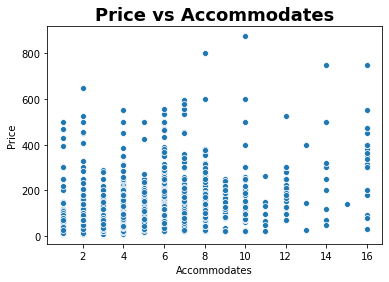

In [26]:
print(df_train.Accommodates.value_counts())
import seaborn as sns
sns.scatterplot(x=df_train['Accommodates'], y=df_train['Price'])
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Price vs Accommodates', fontsize=18, fontweight='bold')

#Accommodates no parece tener outliers

1.0     5221
2.0     2828
3.0     1171
4.0      628
5.0      254
6.0      137
7.0       59
8.0       39
9.0       25
10.0      12
16.0      11
12.0       7
11.0       4
14.0       4
13.0       3
15.0       1
Name: Beds, dtype: int64


Text(0.5, 1.0, 'Price vs Beds')

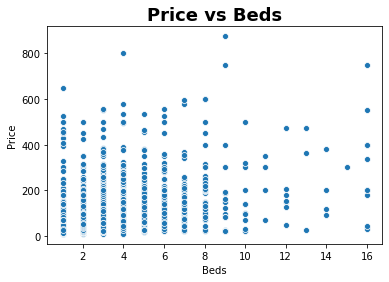

In [27]:
print(df_train.Beds.value_counts())
import seaborn as sns
sns.scatterplot(x=df_train['Beds'], y=df_train['Price'])
plt.xlabel('Beds')
plt.ylabel('Price')
plt.title('Price vs Beds', fontsize=18, fontweight='bold')
#y por lo visto beds tampoco, una opción es que sean hostels. 
#ver la posibilidad futura de analizar esos casos y dividir por habitación individual si fuera posible. 

2       3709
1       3497
3       1743
4        424
5        356
7        268
10       117
6         83
30        69
15        51
14        24
20        21
28        10
12        10
90         9
60         5
25         4
9          4
8          4
21         4
365        3
120        3
13         3
91         2
26         2
17         2
24         1
32         1
40         1
360        1
1125       1
29         1
19         1
89         1
180        1
170        1
99         1
11         1
27         1
Name: Minimum Nights, dtype: int64


Text(0.5, 1.0, 'Price vs Minimum Nights')

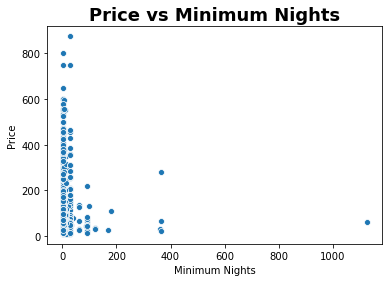

In [28]:
print(df_train['Minimum Nights'].value_counts())
import seaborn as sns
sns.scatterplot(x=df_train['Minimum Nights'], y=df_train['Price'])
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.title('Price vs Minimum Nights', fontsize=18, fontweight='bold')
#Minimum Nights tiene la posibilidad de dejar las más frecuentes y agrupar el resto en other. (por ejemplo, frecuencia de 5 o menos se agrupa en otros) Valoro en V2 

In [29]:
df_train.isnull().sum() #para contar na


Host Since                         3
Host Response Time              1292
Host Response Rate              1292
Neighbourhood Cleansed             0
Neighbourhood Group Cleansed       0
Latitude                           0
Longitude                          0
Property Type                      0
Room Type                          0
Accommodates                       0
Bathrooms                         40
Bedrooms                          18
Beds                              36
Bed Type                           0
Amenities                         86
Price                              8
Security Deposit                5909
Cleaning Fee                    4190
Guests Included                    0
Extra People                       0
Minimum Nights                     0
Maximum Nights                     0
Availability 30                    0
Availability 60                    0
Availability 90                    0
Availability 365                   0
Number of Reviews                  0
R

### Feature engineering y codificación de variables

In [30]:
#Convierto variable Host Since a Antigüedad, para ver los años desde que está en airbnb, teniendo en cuenta que la extracción es de 2017. ya la paso a numérica. 
df_train['Host Since'] = pd.to_datetime(df_train['Host Since'])


In [31]:
df_train['Antiguedad']= 2017 - df_train['Host Since'].dt.year

In [32]:
# hay 3 valores missing. los sustituyo por la media. 
#df_train['Antiguedad'].isnull().sum()
df_train['Antiguedad'].fillna(df_train['Antiguedad'].mean(),inplace= True)

In [33]:
df_train['Antiguedad'].isnull().sum()
#confirmo que me salen 0 

0

In [34]:
df_train= df_train.drop(['Host Since'],axis=1)

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10440 entries, 0 to 11823
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Host Response Time            9148 non-null   object 
 1   Host Response Rate            9148 non-null   float64
 2   Neighbourhood Cleansed        10440 non-null  object 
 3   Neighbourhood Group Cleansed  10440 non-null  object 
 4   Latitude                      10440 non-null  float64
 5   Longitude                     10440 non-null  float64
 6   Property Type                 10440 non-null  object 
 7   Room Type                     10440 non-null  object 
 8   Accommodates                  10440 non-null  int64  
 9   Bathrooms                     10400 non-null  float64
 10  Bedrooms                      10422 non-null  float64
 11  Beds                          10404 non-null  float64
 12  Bed Type                      10440 non-null  object 
 13  A

In [36]:
#Siguiendo el orden de las variables en el dataset, codifico Host Response time: 
df_train['Host Response Time'].value_counts()
#Aplico el método del mean encoder que me relaciona los pesos de cada elemento de la variable con el target. 
mean_encodeRespTime= df_train.groupby('Host Response Time')['Price'].mean()
df_train.loc[:,'Host_Resp_Time_enc']=df_train['Host Response Time'].map(mean_encodeRespTime)
#df_train




In [37]:
#aplico el mean encode al barrio también
mean_encodeNeigh= df_train.groupby('Neighbourhood Cleansed')['Price'].mean()
print(mean_encodeNeigh)
df_train.loc[:,'Neighbourhood_enc']=df_train['Neighbourhood Cleansed'].map(mean_encodeNeigh)

#df_train['Neighbourhood_enc'].value_counts()


Neighbourhood Cleansed
Abrantes                         29.083333
Acacias                          44.912281
Adelfas                          54.263158
Aeropuerto                       30.600000
Aguilas                          24.083333
Alameda de Osuna                 40.894737
Almagro                          80.226891
Almenara                         49.727273
Almendrales                      48.921053
Aluche                           29.676471
Ambroz                           23.300000
Amposta                          20.400000
Apostol Santiago                 42.545455
Arapiles                         59.345324
Aravaca                          49.100000
Arcos                            26.100000
Argüelles                        69.155000
Atocha                           55.666667
Bellas Vistas                    41.238095
Berruguete                       45.320000
Buenavista                       39.950000
Butarque                         27.166667
Campamento                     

In [38]:
#aplico el mean encode al barrio agrupado también
mean_encodeNeighGr= df_train.groupby('Neighbourhood Group Cleansed')['Price'].mean()
#print(mean_encodeNeighGr)
df_train.loc[:,'Neighbourhood_Gr_enc']=df_train['Neighbourhood Group Cleansed'].map(mean_encodeNeighGr)
#df_train
#df_train['Neighbourhood_Gr_enc'].value_counts()

In [39]:
#lo mismo con property type
df_train['Property Type'].value_counts()
mean_encodePropType= df_train.groupby('Property Type')['Price'].mean()
#print(mean_encodePropType)
#como en este caso me parece que hay demasiadas categorías con pocos valores, me planteo agrupar en la categoría "other" las propiedades por debajo de 10. Revisar a futuro 
df_train.loc[:,'PropertyType_enc']=df_train['Property Type'].map(mean_encodePropType)
#df_train
#df_train['PropertyType_enc'].value_counts()

In [40]:
#lo mismo con room type
df_train['Room Type'].value_counts()
mean_encodeRoomType= df_train.groupby('Room Type')['Price'].mean()
#print(mean_encodeRoomType)
df_train.loc[:,'RoomType_enc']=df_train['Room Type'].map(mean_encodeRoomType)
#df_train
#df_train['RoomType_enc'].value_counts()

In [41]:
#lo mismo con bed type
df_train['Bed Type'].value_counts()
mean_encodeBedType= df_train.groupby('Bed Type')['Price'].mean()
#print(mean_encodeBedType)
df_train.loc[:,'BedType_enc']=df_train['Bed Type'].map(mean_encodeBedType)
#df_train
#df_train['BedType_enc'].value_counts()


In [42]:
#df_train.info()

In [43]:
#me salto amenities para terminar con la codificación de Cancellation policy: 
df_train['Cancellation Policy'].value_counts()

mean_encodeCancPol= df_train.groupby('Cancellation Policy')['Price'].mean()
#print(mean_encodeCancPol)
df_train.loc[:,'CancellationPolicy_enc']=df_train['Cancellation Policy'].map(mean_encodeCancPol)
#df_train
#df_train['CancellationPolicy_enc'].value_counts()

In [44]:
df_train= df_train.drop(['Host Response Time','Neighbourhood Cleansed','Neighbourhood Group Cleansed','Property Type','Room Type','Bed Type','Cancellation Policy'],axis=1)


In [45]:
#Las dos variables que me quedan como object son listas. con value_counts observo y decido
#df_train['Amenities'].value_counts() 

#tiene muchas amenities, selecciono las que para mí son importantes a la hora de que alguien con características especiales busque apartamento (a confirmar con cliente) y agrupo el resto por número de extras. 


In [46]:
#AMENITIES: 

In [47]:
df_train['Internet'] = df_train['Amenities'].str.extract(r'(Internet)')

In [48]:
df_train['Internet'].fillna(0,inplace=True)

In [49]:
df_train['Internet']=df_train['Internet'].apply(lambda x: 1 if x!=0 else 0)
#df_train['Internet']

In [50]:
df_train['Smoking_allowed'] = df_train['Amenities'].str.extract(r'(Smoking allowed)')


In [51]:
df_train['Smoking_allowed'].fillna(0,inplace=True)


In [52]:
df_train['Smoking_allowed']=df_train['Smoking_allowed'].apply(lambda x: 1 if x!=0 else 0)
#df_train['smoking allowed']

In [53]:
df_train['Pets_allowed'] = df_train['Amenities'].str.extract(r'(Pets allowed)')

In [54]:
df_train['Pets_allowed'].fillna(0,inplace=True)

In [55]:
df_train['Pets_allowed']=df_train['Pets_allowed'].apply(lambda x: 1 if x!=0 else 0)
#df_train['Pets allowed']

In [56]:
#df_train.Amenities.str.split(',').apply(len)
df_train['Total_Amenities'] = df_train['Amenities'].apply(lambda x: len(str(x).split(',')))

In [57]:
df_train['Features'].value_counts() #las características del host entiendo que afectan al precio porque si es de fiar puede poner el piso más caro...pero que tenga foto o no no me parece relevante. cuento el total de características que apoyan que el host sea de fiar. 
df_train['Total_Features'] = df_train['Features'].apply(lambda x: len(str(x).split(',')))

In [58]:
df_train= df_train.drop(['Amenities', 'Features'],axis=1)

In [59]:
df_train.head()

Host Response Rate   Latitude  Longitude  Accommodates  Bathrooms  \
0               100.0  40.407732  -3.684819             4        1.0   
1               100.0  40.415802  -3.705340             4        1.0   
3               100.0  40.412814  -3.703052             2        3.0   
4               100.0  40.438631  -3.713716             2        1.0   
5               100.0  40.411880  -3.702481             1        1.0   

   Bedrooms  Beds  Price  Security Deposit  Cleaning Fee  Guests Included  \
0       1.0   2.0   60.0               NaN          25.0                1   
1       1.0   2.0   50.0               NaN          15.0                1   
3       1.0   1.0   30.0               NaN           NaN                1   
4       1.0   1.0   32.0               NaN           NaN                1   
5       1.0   1.0   35.0               NaN           NaN                1   

   Extra People  Minimum Nights  Maximum Nights  Availability 30  \
0             0               2            1125                9   
1             0               1            1125               15   
3             0              10            1125                0   
4            10               1            1125                7   
5             0               2              60               21   

   Availability 60  Availability 90  Availability 365  Number of Reviews  \
0               32               52               117                 12   
1               39               64               208                 20   
3                6               36               311                  0   
4               34               62               337                 97   
5               51               81               356                 43   

   Review Scores Rating  Review Scores Accuracy  Review Scores Cleanliness  \
0                  95.0                     9.0                       10.0   
1                  91.0                     9.0                        9.0   
3                   NaN                     NaN                        NaN   
4                  92.0                     9.0                        9.0   
5                  97.0                    10.0                       10.0   

   Review Scores Checkin  Review Scores Communication  Review Scores Location  \
0                   10.0                         10.0                    10.0   
1                   10.0                         10.0                    10.0   
3                    NaN                          NaN                     NaN   
4                    9.0                         10.0                     9.0   
5                   10.0                         10.0                    10.0   

   Review Scores Value  Antiguedad  Host_Resp_Time_enc  Neighbourhood_enc  \
0                  9.0         2.0           70.637189         104.600000   
1                 10.0         1.0           68.055615          86.344692   
3                  NaN         3.0           70.637189          60.865712   
4                  9.0         5.0           68.055615          56.477064   
5                 10.0         3.0           68.055615          60.865712   

   Neighbourhood_Gr_enc  PropertyType_enc  RoomType_enc  BedType_enc  \
0             70.691429         68.080023     87.603851    66.882382   
1             73.152069         68.080023     87.603851    66.882382   
3             73.152069         68.080023     34.242188    66.882382   
4             72.564069         68.080023     34.242188    66.882382   
5             73.152069         68.080023     34.242188    66.882382   

   CancellationPolicy_enc  Internet  Smoking_allowed  Pets_allowed  \
0               63.266242         1                0             0   
1               57.634633         1                0             0   
3               77.009684         1                1             0   
4               77.009684         1                0             0   
5               77.009684         1    

In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10440 entries, 0 to 11823
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Host Response Rate           9148 non-null   float64
 1   Latitude                     10440 non-null  float64
 2   Longitude                    10440 non-null  float64
 3   Accommodates                 10440 non-null  int64  
 4   Bathrooms                    10400 non-null  float64
 5   Bedrooms                     10422 non-null  float64
 6   Beds                         10404 non-null  float64
 7   Price                        10432 non-null  float64
 8   Security Deposit             4531 non-null   float64
 9   Cleaning Fee                 6250 non-null   float64
 10  Guests Included              10440 non-null  int64  
 11  Extra People                 10440 non-null  int64  
 12  Minimum Nights               10440 non-null  int64  
 13  Maximum Nights  

### correlación para entender el problema


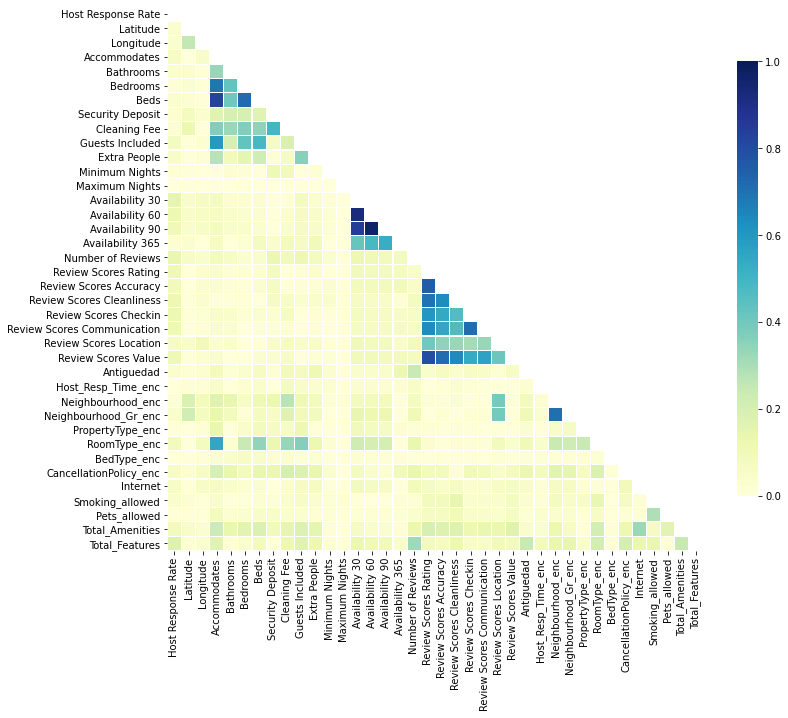

In [61]:
# Visualización de la matriz de correlación
corr = np.abs(df_train.drop(['Price'], axis=1).corr())


mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(12, 10))


sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [62]:
df_train.corr()
#hago la matriz de correlación para ver la correlación numérica también entre las variables y con respecto a precio

Host Response Rate  Latitude  Longitude  \
Host Response Rate                     1.000000 -0.037692  -0.031806   
Latitude                              -0.037692  1.000000   0.257482   
Longitude                             -0.031806  0.257482   1.000000   
Accommodates                           0.060064 -0.000737  -0.047663   
Bathrooms                             -0.038543  0.039032   0.004749   
Bedrooms                               0.011944  0.031654   0.008615   
Beds                                   0.036398  0.024842  -0.010395   
Price                                 -0.003428  0.067582  -0.031963   
Security Deposit                      -0.024288  0.079825   0.034507   
Cleaning Fee                           0.026003  0.123082   0.008271   
Guests Included                        0.076296 -0.009586  -0.026808   
Extra People                           0.054682  0.007380  -0.013367   
Minimum Nights                         0.016593 -0.006279  -0.003651   
Maximum Nights                         0.001400  0.004507  -0.003561   
Availability 30                       -0.150690  0.050217   0.064763   
Availability 60                       -0.123274  0.051098   0.060837   
Availability 90                       -0.109025  0.044784   0.058878   
Availability 365                      -0.026703  0.027808   0.003314   
Number of Reviews                      0.137963 -0.060218  -0.039084   
Review Scores Rating                   0.115046 -0.001457   0.027386   
Review Scores Accuracy                 0.098557  0.003546   0.030284   
Review Scores Cleanliness              0.120780 -0.010512   0.029267   
Review Scores Checkin                  0.124905  0.007959   0.020505   
Review Scores Communication            0.112509  0.005831   0.019260   
Review Scores Location                 0.064307  0.048625  -0.097226   
Review Scores Value                    0.110390 -0.009244   0.024181   
Antiguedad                             0.037656  0.017506  -0.023874   
Host_Resp_Time_enc                     0.002372 -0.014085   0.013063   
Neighbourhood_enc                      0.023422  0.191515  -0.091670   
Neighbourhood_Gr_enc                   0.042826  0.220193  -0.077088   
PropertyType_enc                       0.006459 -0.003850  -0.018133   
RoomType_enc                           0.086836  0.004417  -0.076153   
BedType_enc                           -0.003508  0.004806   0.013460   
CancellationPolicy_enc                 0.055024 -0.024622  -0.057050   
Internet                               0.061539 -0.008219  -0.056470   
Smoking_allowed                       -0.039063 -0.025730  -0.010037   
Pets_allowed                          -0.004723  0.006070   0.007209   
Total_Amenities                        0.083551  0.052515   0.029914   
Total_Features                         0.180983 -0.021562  -0.034495   

                             Accommodates  Bathrooms  Bedrooms      Beds  \
Host Response Rate               0.060064  -0.038543  0.011944  0.036398   
Latitude                        -0.000737   0.039032  0.031654  0.024842   
Longitude                       -0.047663   0.004749  0.008615 -0.010395   
Accommodates                     1.000000   0.335901  0.691240  0.831166   
Bathrooms                        0.335901   1.000000  0.432925  0.408498   
Bedrooms                         0.691240   0.432925  1.000000  0.718604   
Beds                             0.831166   0.408498  0.718604  1.000000   
Price                            0.599503   0.354009  0.518532  0.517736   
Security Deposit                 0.166086   0.196708  0.201319  0.165369   
Cleaning Fee                     0.368444   0.328521  0.370154  0.348712   
Guests Included                  0.597521   0.198967  0.430628  0.488045   
Extra People                     0.278425   0.095857  0.153892  0.219728   
Minimum Nights                   0.001143   0.025038  0.012731  0.001665   
Maximum Nights                   0.000676  -0.003833 -0.000107  0.000737   
Availabi

In [63]:
df_train.corr()['Price'].sort_values(ascending=False)
#aquí ordeno la correlación de las variables con target. 

Price                          1.000000
Cleaning Fee                   0.669667
Accommodates                   0.599503
Bedrooms                       0.518532
Beds                           0.517736
RoomType_enc                   0.464418
Security Deposit               0.376770
Guests Included                0.367191
Bathrooms                      0.354009
Neighbourhood_enc              0.343771
Neighbourhood_Gr_enc           0.242100
Total_Amenities                0.199283
CancellationPolicy_enc         0.150522
Review Scores Location         0.139751
Extra People                   0.122920
Total_Features                 0.118397
PropertyType_enc               0.110127
Review Scores Cleanliness      0.080149
Antiguedad                     0.079555
Availability 365               0.078066
Latitude                       0.067582
Host_Resp_Time_enc             0.057847
Review Scores Accuracy         0.053436
Review Scores Rating           0.053011
Minimum Nights                 0.033504


In [64]:
# Viendo la matriz de correlación veo que beds tiene una correlación muy alta con Accommodates y la interpretabilidad probablemente sea redundante y Accommodates tiene una correlación mayor con el Precio. 
# Visualizo la relación entre ellas y decido dejarlas de momento y ver qué me dice la selección de variables..  
# También veo la gráfica entre cleaning fee y precio, que son las más correlacionadas. 
# Elimino las variables de availability 30, 60 y 90. Dejo 365 para que decida la selección de variables por mí. 
#neighbourhood_gr_enc parece menos determinante para el modelo que neighbourhood. elimino también. 
df_train= df_train.drop(['Availability 30','Availability 60','Availability 90','Neighbourhood_Gr_enc'],axis=1)


Text(0.5, 1.0, 'Accommodates vs Beds')

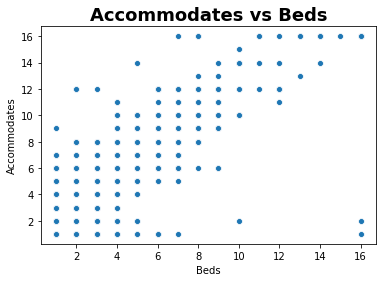

In [65]:
sns.scatterplot(x=df_train['Beds'], y=df_train['Accommodates'])
plt.xlabel('Beds')
plt.ylabel('Accommodates')
plt.title('Accommodates vs Beds', fontsize=18, fontweight='bold')
#igual no son tan similares. valorar. 

Text(0.5, 1.0, 'Price vs Cleaning Fee')

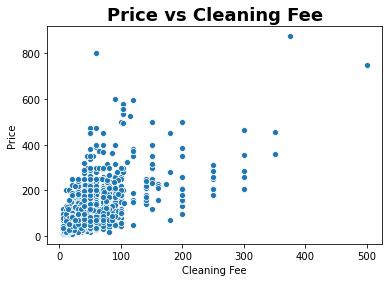

In [66]:
sns.scatterplot(x=df_train['Cleaning Fee'], y=df_train['Price'])
plt.xlabel('Cleaning Fee')
plt.ylabel('Price')
plt.title('Price vs Cleaning Fee', fontsize=18, fontweight='bold')

In [67]:
# las variables de review tienen todas una correlación alta entre ellas y baja con el precio. 
#Decido generar una nueva variable conjunta por si aumenta la influencia en el modelo. 

df_train['average_review'] = df_train[['Review Scores Rating','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value']].mean(axis=1)
#Review Scores Location tiene una corr con Price de 0.144. y Cleanliness también superior al resultado del average. 
#me cargo las que están por debajo y dejo estas dos además de average, ya que además son las que más información dan del apartamento. 
df_train.corr()['Price'].sort_values(ascending=False)

Price                          1.000000
Cleaning Fee                   0.669667
Accommodates                   0.599503
Bedrooms                       0.518532
Beds                           0.517736
RoomType_enc                   0.464418
Security Deposit               0.376770
Guests Included                0.367191
Bathrooms                      0.354009
Neighbourhood_enc              0.343771
Total_Amenities                0.199283
CancellationPolicy_enc         0.150522
Review Scores Location         0.139751
Extra People                   0.122920
Total_Features                 0.118397
PropertyType_enc               0.110127
Review Scores Cleanliness      0.080149
Antiguedad                     0.079555
Availability 365               0.078066
average_review                 0.069961
Latitude                       0.067582
Host_Resp_Time_enc             0.057847
Review Scores Accuracy         0.053436
Review Scores Rating           0.053011
Minimum Nights                 0.033504


In [68]:
df_train= df_train.drop(['Review Scores Rating','Review Scores Accuracy','Review Scores Checkin','Review Scores Communication','Review Scores Value'],axis=1)


In [69]:
df_train.head()
#sns.pairplot(df_train,height=5) no puedo hacerlo me resetea el kernel


Host Response Rate   Latitude  Longitude  Accommodates  Bathrooms  \
0               100.0  40.407732  -3.684819             4        1.0   
1               100.0  40.415802  -3.705340             4        1.0   
3               100.0  40.412814  -3.703052             2        3.0   
4               100.0  40.438631  -3.713716             2        1.0   
5               100.0  40.411880  -3.702481             1        1.0   

   Bedrooms  Beds  Price  Security Deposit  Cleaning Fee  Guests Included  \
0       1.0   2.0   60.0               NaN          25.0                1   
1       1.0   2.0   50.0               NaN          15.0                1   
3       1.0   1.0   30.0               NaN           NaN                1   
4       1.0   1.0   32.0               NaN           NaN                1   
5       1.0   1.0   35.0               NaN           NaN                1   

   Extra People  Minimum Nights  Maximum Nights  Availability 365  \
0             0               2            1125               117   
1             0               1            1125               208   
3             0              10            1125               311   
4            10               1            1125               337   
5             0               2              60               356   

   Number of Reviews  Review Scores Cleanliness  Review Scores Location  \
0                 12                       10.0                    10.0   
1                 20                        9.0                    10.0   
3                  0                        NaN                     NaN   
4                 97                        9.0                     9.0   
5                 43                       10.0                    10.0   

   Antiguedad  Host_Resp_Time_enc  Neighbourhood_enc  PropertyType_enc  \
0         2.0           70.637189         104.600000         68.080023   
1         1.0           68.055615          86.344692         68.080023   
3         3.0           70.637189          60.865712         68.080023   
4         5.0           68.055615          56.477064         68.080023   
5         3.0           68.055615          60.865712         68.080023   

   RoomType_enc  BedType_enc  CancellationPolicy_enc  Internet  \
0     87.603851    66.882382               63.266242         1   
1     87.603851    66.882382               57.634633         1   
3     34.242188    66.882382               77.009684         1   
4     34.242188    66.882382               77.009684         1   
5     34.242188    66.882382               77.009684         1   

   Smoking_allowed  Pets_allowed  Total_Amenities  Total_Features  \
0                0             0               13               3   
1                0             0               18               4   
3                1             0                5               2   
4                0             0               15               4   
5                1             0               15               5   

   average_review  
0       21.857143  
1       21.285714  
3             NaN  
4       21.000000  
5       22.428571

In [70]:
#llegados a este punto tengo todas las variables codificadas y he creado algunas variables que creo me pueden aportar información. 
#tengo que solucionar los valores nan para poder aplicar la selección de variables.
#df_train.isnull().sum()

#En el caso de Cleaning Fee y Security Deposit: cambio nan por 0. Entiendo que los que no lo han puesto es porque no lo tienen como extra. 
df_train['Security Deposit'].fillna(0,inplace=True)
df_train['Cleaning Fee'].fillna(0,inplace=True)






In [71]:
#A Beds, Bedrooms y Bathrooms les aplico la moda. Para que cojan el valor más común sin decimales. En bathrooms hay algún valor decimal, entiendo que porque habrá algún aseo. no lo toco. 
df_train['Beds'].fillna(df_train['Beds'].mode()[0], inplace= True)
df_train['Bathrooms'].fillna(df_train['Bathrooms'].mode()[0], inplace= True)
df_train['Bedrooms'].fillna(df_train['Bedrooms'].mode()[0], inplace= True)


In [72]:
#Al resto de variables les aplico la media. 
df_train.fillna(df_train.mean(), inplace= True)

In [73]:
df_train.isnull().sum()

Host Response Rate           0
Latitude                     0
Longitude                    0
Accommodates                 0
Bathrooms                    0
Bedrooms                     0
Beds                         0
Price                        0
Security Deposit             0
Cleaning Fee                 0
Guests Included              0
Extra People                 0
Minimum Nights               0
Maximum Nights               0
Availability 365             0
Number of Reviews            0
Review Scores Cleanliness    0
Review Scores Location       0
Antiguedad                   0
Host_Resp_Time_enc           0
Neighbourhood_enc            0
PropertyType_enc             0
RoomType_enc                 0
BedType_enc                  0
CancellationPolicy_enc       0
Internet                     0
Smoking_allowed              0
Pets_allowed                 0
Total_Amenities              0
Total_Features               0
average_review               0
dtype: int64

In [74]:
df_train.describe() #sigo viendo posibles outliers. dibujo histograma y boxplot del precio

Host Response Rate      Latitude     Longitude  Accommodates  \
count        10440.000000  10440.000000  10440.000000  10440.000000   
mean            94.831001     40.420510     -3.697080      3.180651   
std             14.266787      0.019693      0.023276      1.960949   
min              0.000000     40.332908     -3.835498      1.000000   
25%             94.831001     40.410113     -3.707721      2.000000   
50%            100.000000     40.418483     -3.701552      2.000000   
75%            100.000000     40.427707     -3.693874      4.000000   
max            100.000000     40.514247     -3.575142     16.000000   

          Bathrooms      Bedrooms          Beds         Price  \
count  10440.000000  10440.000000  10440.000000  10440.000000   
mean       1.255077      1.298563      1.964943     66.652032   
std        0.599376      0.837180      1.470245     56.091164   
min        0.000000      0.000000      1.000000      9.000000   
25%        1.000000      1.000000      1.000000     32.000000   
50%        1.000000      1.000000      1.000000     55.000000   
75%        1.000000      2.000000      2.000000     80.000000   
max        8.000000     10.000000     16.000000    875.000000   

       Security Deposit  Cleaning Fee  Guests Included  Extra People  \
count      10440.000000  10440.000000     10440.000000  10440.000000   
mean          79.898659     18.029023         1.576628      7.401245   
std          116.816621     25.659957         1.077098     10.625446   
min            0.000000      0.000000         1.000000      0.000000   
25%            0.000000      0.000000         1.000000      0.000000   
50%            0.000000     10.000000         1.000000      0.000000   
75%          150.000000     30.000000         2.000000     14.000000   
max          990.000000    500.000000        16.000000    276.000000   

       Minimum Nights  Maximum Nights  Availability 365  Number of Reviews  \
count    10440.000000    10440.000000      10440.000000       10440.000000   
mean         3.111494      978.779119        205.366188          23.319636   
std         14.215529     9988.767303        126.903485          38.520344   
min          1.000000        1.000000          0.000000           0.000000   
25%          1.000000      365.000000         83.000000           1.000000   
50%          2.000000     1125.000000        247.500000           7.000000   
75%          3.000000     1125.000000        320.000000          28.000000   
max       1125.000000  1000000.000000        365.000000         356.000000   

       Review Scores Cleanliness  Review Scores Location    Antiguedad  \
count               10440.000000            10440.000000  10440.000000   
mean                    9.327430                9.551627      2.710262   
std                     0.881805                0.667683      1.624715   
min                     2.000000                2.000000      0.000000   
25%                     9.000000                9.000000      1.000000   
50%                     9.327430               10.000000      2.000000   
75%                    10.000000               10.000000      4.000000   
max                    10.000000               10.000000      8.000000   

       Host_Resp_Time_enc  Neighbourhood_enc  PropertyType_enc  RoomType_enc  \
count        10440.000000       10440.000000      10440.000000  10440.000000   
mean            67.724644          66.665155         66.650876     66.657865   
std              3.000071          19.302113          6.178412     26.058461   
min             60.185491          18.500000         17.000000     34.242188   
25%             68.055615          56.477064         68.080023     34.242188   
50%             68.055615          67.722915         68.080023     87.603851   
75%             68.055615          80.258842         68.080023     87.603851   
max             73.330144         280.000000        203.750000     87.603851   

        BedType_enc  CancellationPolicy_e

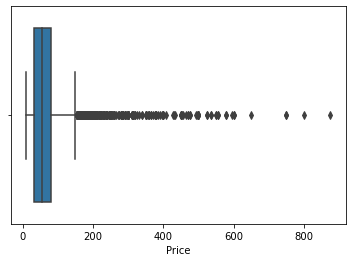

In [75]:
sns.boxplot(x=df_train['Price'])

In [76]:
#Q1 = df_train.quantile(0.25)
#Q3 = df_train.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)

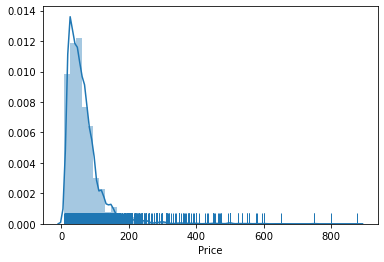

In [77]:
sns.distplot(df_train['Price'], rug= True)

In [78]:
sum(df_train['Price']>250) #decido eliminar valores de precio por encima de 250 

136

In [79]:
sum(df_train['Price']>250) / len(df_train)*100

1.3026819923371646

In [80]:
df_train=df_train[df_train['Price']<250]

In [81]:
df_train.describe()

Host Response Rate      Latitude     Longitude  Accommodates  \
count        10277.000000  10277.000000  10277.000000  10277.000000   
mean            94.854292     40.420435     -3.697097      3.116863   
std             14.127974      0.019725      0.023250      1.842173   
min              0.000000     40.332908     -3.835498      1.000000   
25%             94.831001     40.410050     -3.707741      2.000000   
50%            100.000000     40.418332     -3.701612      2.000000   
75%            100.000000     40.427682     -3.693923      4.000000   
max            100.000000     40.514247     -3.575142     16.000000   

          Bathrooms      Bedrooms          Beds         Price  \
count  10277.000000  10277.000000  10277.000000  10277.000000   
mean       1.234212      1.268755      1.918361     61.978127   
std        0.561449      0.780610      1.366924     39.527511   
min        0.000000      0.000000      1.000000      9.000000   
25%        1.000000      1.000000      1.000000     32.000000   
50%        1.000000      1.000000      1.000000     52.000000   
75%        1.000000      1.000000      2.000000     80.000000   
max        8.000000     10.000000     16.000000    249.000000   

       Security Deposit  Cleaning Fee  Guests Included  Extra People  \
count      10277.000000  10277.000000     10277.000000  10277.000000   
mean          78.634037     17.040868         1.558042      7.363725   
std          114.000090     21.704424         1.014618     10.280583   
min            0.000000      0.000000         1.000000      0.000000   
25%            0.000000      0.000000         1.000000      0.000000   
50%            0.000000     10.000000         1.000000      0.000000   
75%          150.000000     30.000000         2.000000     14.000000   
max          990.000000    300.000000        16.000000    276.000000   

       Minimum Nights  Maximum Nights  Availability 365  Number of Reviews  \
count    10277.000000    10277.000000      10277.000000       10277.000000   
mean         3.027926      979.238786        204.814245          23.532354   
std         13.822968    10067.557036        127.076345          38.728299   
min          1.000000        1.000000          0.000000           0.000000   
25%          1.000000      365.000000         82.000000           1.000000   
50%          2.000000     1125.000000        247.000000           8.000000   
75%          3.000000     1125.000000        320.000000          29.000000   
max       1125.000000  1000000.000000        365.000000         356.000000   

       Review Scores Cleanliness  Review Scores Location    Antiguedad  \
count               10277.000000            10277.000000  10277.000000   
mean                    9.326080                9.549851      2.710045   
std                     0.885971                0.670720      1.624705   
min                     2.000000                2.000000      0.000000   
25%                     9.000000                9.000000      1.000000   
50%                     9.327430               10.000000      2.000000   
75%                    10.000000               10.000000      4.000000   
max                    10.000000               10.000000      8.000000   

       Host_Resp_Time_enc  Neighbourhood_enc  PropertyType_enc  RoomType_enc  \
count        10277.000000       10277.000000      10277.000000  10277.000000   
mean            67.711823          66.336085         66.631553     66.424302   
std              3.003815          18.942805          6.055014     26.108792   
min             60.185491          18.500000         17.000000     34.242188   
25%             68.055615          55.945455         68.080023     34.242188   
50%             68.055615          67.722915         68.080023     87.603851   
75%             68.055615          80.258842         68.080023     87.603851   
max             73.330144         280.000000        203.750000     87.603851   

        BedType_enc  CancellationPolicy_e

In [82]:
# muevo la columna Price a la primera posición: 
col = df_train.pop("Price")
df_train.insert(0, col.name, col)

In [83]:
df_train.head()

Price  Host Response Rate   Latitude  Longitude  Accommodates  Bathrooms  \
0   60.0               100.0  40.407732  -3.684819             4        1.0   
1   50.0               100.0  40.415802  -3.705340             4        1.0   
3   30.0               100.0  40.412814  -3.703052             2        3.0   
4   32.0               100.0  40.438631  -3.713716             2        1.0   
5   35.0               100.0  40.411880  -3.702481             1        1.0   

   Bedrooms  Beds  Security Deposit  Cleaning Fee  Guests Included  \
0       1.0   2.0               0.0          25.0                1   
1       1.0   2.0               0.0          15.0                1   
3       1.0   1.0               0.0           0.0                1   
4       1.0   1.0               0.0           0.0                1   
5       1.0   1.0               0.0           0.0                1   

   Extra People  Minimum Nights  Maximum Nights  Availability 365  \
0             0               2            1125               117   
1             0               1            1125               208   
3             0              10            1125               311   
4            10               1            1125               337   
5             0               2              60               356   

   Number of Reviews  Review Scores Cleanliness  Review Scores Location  \
0                 12                   10.00000               10.000000   
1                 20                    9.00000               10.000000   
3                  0                    9.32743                9.551627   
4                 97                    9.00000                9.000000   
5                 43                   10.00000               10.000000   

   Antiguedad  Host_Resp_Time_enc  Neighbourhood_enc  PropertyType_enc  \
0         2.0           70.637189         104.600000         68.080023   
1         1.0           68.055615          86.344692         68.080023   
3         3.0           70.637189          60.865712         68.080023   
4         5.0           68.055615          56.477064         68.080023   
5         3.0           68.055615          60.865712         68.080023   

   RoomType_enc  BedType_enc  CancellationPolicy_enc  Internet  \
0     87.603851    66.882382               63.266242         1   
1     87.603851    66.882382               57.634633         1   
3     34.242188    66.882382               77.009684         1   
4     34.242188    66.882382               77.009684         1   
5     34.242188    66.882382               77.009684         1   

   Smoking_allowed  Pets_allowed  Total_Amenities  Total_Features  \
0                0             0               13               3   
1                0             0               18               4   
3                1             0                5               2   
4                0             0               15               4   
5                1             0               15               5   

   average_review  
0       21.857143  
1       21.285714  
3       21.275385  
4       21.000000  
5       22.428571

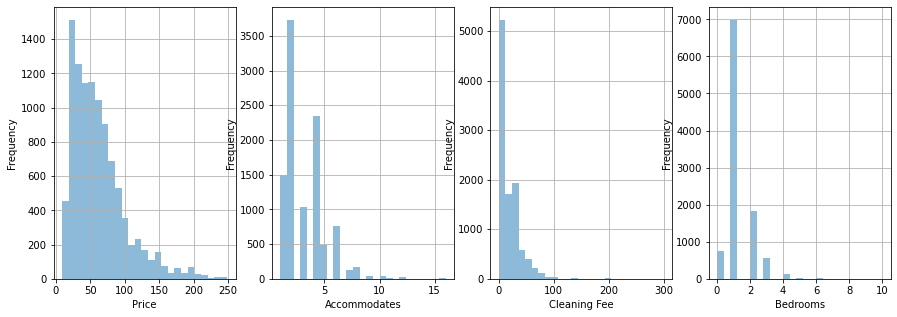

In [84]:
plt.figure(figsize=(15, 5))

plt.subplot(1,4,1)
df_train['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Price')

plt.subplot(1,4,2)
df_train['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Accommodates')

plt.subplot(1,4,3)
df_train['Cleaning Fee'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Cleaning Fee')

plt.subplot(1,4,4)
df_train['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bedrooms')

plt.show()

Text(0.5, 1.0, 'Price vs Neighbourhood_enc')

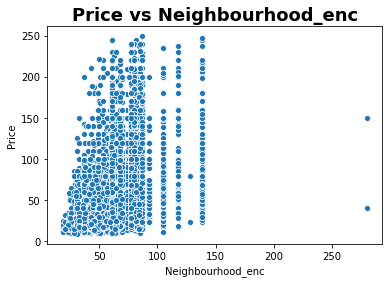

In [85]:
sns.scatterplot(x=df_train['Neighbourhood_enc'], y=df_train['Price'])
plt.xlabel('Neighbourhood_enc')
plt.ylabel('Price')
plt.title('Price vs Neighbourhood_enc', fontsize=18, fontweight='bold')


<function matplotlib.pyplot.show(*args, **kw)>

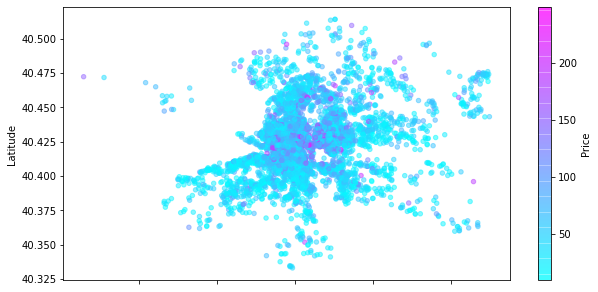

In [86]:
df_train.plot.scatter(x='Longitude',y='Latitude',c='Price',figsize=(10,10), cmap='cool',alpha=0.5)
plt.xlabel('Longitude',fontsize=20)
plt.gcf().subplots_adjust(bottom=0.5)
plt.show

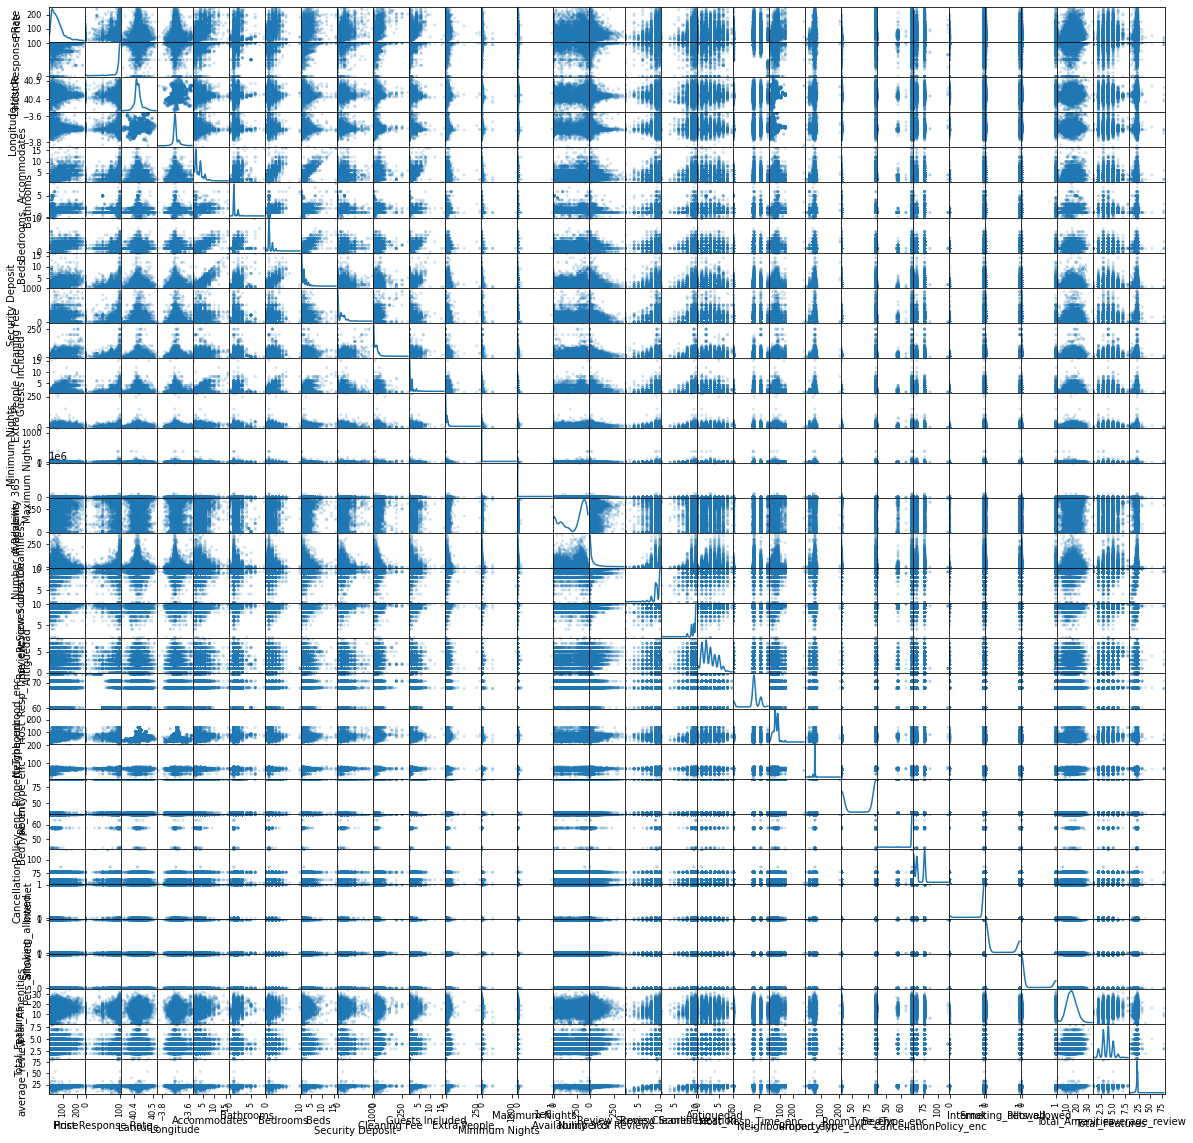

In [87]:
pd.plotting.scatter_matrix(df_train, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

## Preprocesamiento, selección y aplicación de modelo

In [88]:
# convertimos el DataFrame al formato necesario para scikit-learn
from sklearn import preprocessing

data = df_train.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data[:,1:]      # nos quedamos con el resto
feature_names = df_train.columns[1:]
# Escalamos (con los datos SOLO de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

best mean cross-validation score: -578.405
best parameters: {'alpha': 0.06011008864405606}


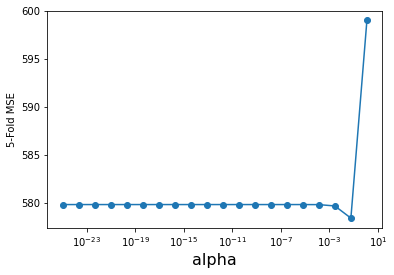

In [89]:
#decido probar con Lasso porque me ayuda a seleccionar variables. 
#primero tengo que ver qué valor de alpha es el adecuado y la mejor manera es con gridsearch (cross validation)
#PRUEBO VARIOS ALPHA Y muevo los mínimos y máximos para intentar ver dónde baja la curva.
#Por más que amplío por la izquierda el error está bastante estable en 580..

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
alpha_vector = np.logspace(-25,0.1,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')

plt.show()

In [90]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
#lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)
ytrainLasso = lasso.predict(XtrainScaled)
#ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
#mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
#print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
#print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 574
RMSE Modelo Lasso (train): 24
Host Response Rate -1.3636996670006372
Latitude 0.10322208222814369
Longitude 0.2668937526124596
Accommodates 9.71597723178641
Bathrooms 2.678537985174898
Bedrooms 6.769334393960609
Beds -0.6476510202025197
Security Deposit 1.0217325075877497
Cleaning Fee 6.509797446883886
Guests Included 1.580125302770652
Extra People -2.3728278718538167
Minimum Nights -0.40772594722231253
Maximum Nights -0.09154782396865313
Availability 365 2.1964728881334596
Number of Reviews -3.849491815700085
Review Scores Cleanliness 2.005249032538653
Review Scores Location 0.7698056556415842
Antiguedad 1.0335581521033557
Host_Resp_Time_enc 0.0
Neighbourhood_enc 7.433226587046828
PropertyType_enc -0.0
RoomType_enc 12.2341240489096
BedType_enc 0.5411470140508644
CancellationPolicy_enc -1.2633388253137154
Internet -0.19573683128988673
Smoking_allowed -0.5793275933775824
Pets_allowed -0.8911966791714642
Total_Amenities 1.5593035874278147
Total_Features 0.37

In [91]:
df_train.describe()

Price  Host Response Rate      Latitude     Longitude  \
count  10277.000000        10277.000000  10277.000000  10277.000000   
mean      61.978127           94.854292     40.420435     -3.697097   
std       39.527511           14.127974      0.019725      0.023250   
min        9.000000            0.000000     40.332908     -3.835498   
25%       32.000000           94.831001     40.410050     -3.707741   
50%       52.000000          100.000000     40.418332     -3.701612   
75%       80.000000          100.000000     40.427682     -3.693923   
max      249.000000          100.000000     40.514247     -3.575142   

       Accommodates     Bathrooms      Bedrooms          Beds  \
count  10277.000000  10277.000000  10277.000000  10277.000000   
mean       3.116863      1.234212      1.268755      1.918361   
std        1.842173      0.561449      0.780610      1.366924   
min        1.000000      0.000000      0.000000      1.000000   
25%        2.000000      1.000000      1.000000      1.000000   
50%        2.000000      1.000000      1.000000      1.000000   
75%        4.000000      1.000000      1.000000      2.000000   
max       16.000000      8.000000     10.000000     16.000000   

       Security Deposit  Cleaning Fee  Guests Included  Extra People  \
count      10277.000000  10277.000000     10277.000000  10277.000000   
mean          78.634037     17.040868         1.558042      7.363725   
std          114.000090     21.704424         1.014618     10.280583   
min            0.000000      0.000000         1.000000      0.000000   
25%            0.000000      0.000000         1.000000      0.000000   
50%            0.000000     10.000000         1.000000      0.000000   
75%          150.000000     30.000000         2.000000     14.000000   
max          990.000000    300.000000        16.000000    276.000000   

       Minimum Nights  Maximum Nights  Availability 365  Number of Reviews  \
count    10277.000000    10277.000000      10277.000000       10277.000000   
mean         3.027926      979.238786        204.814245          23.532354   
std         13.822968    10067.557036        127.076345          38.728299   
min          1.000000        1.000000          0.000000           0.000000   
25%          1.000000      365.000000         82.000000           1.000000   
50%          2.000000     1125.000000        247.000000           8.000000   
75%          3.000000     1125.000000        320.000000          29.000000   
max       1125.000000  1000000.000000        365.000000         356.000000   

       Review Scores Cleanliness  Review Scores Location    Antiguedad  \
count               10277.000000            10277.000000  10277.000000   
mean                    9.326080                9.549851      2.710045   
std                     0.885971                0.670720      1.624705   
min                     2.000000                2.000000      0.000000   
25%                     9.000000                9.000000      1.000000   
50%                     9.327430               10.000000      2.000000   
75%                    10.000000               10.000000      4.000000   
max                    10.000000               10.000000      8.000000   

       Host_Resp_Time_enc  Neighbourhood_enc  PropertyType_enc  RoomType_enc  \
count        10277.000000       10277.000000      10277.000000  10277.000000   
mean            67.711823          66.336085         66.631553     66.424302   
std              3.003815          18.942805          6.055014     26.108792   
min             60.185491          18.500000         17.000000     34.242188   
25%             68.055615          55.945455         68.080023     34.242188   
50%             68.055615          67.722915         68.080023     87.603851   
75%             68.055615          80.258842         68.080023     87.603851   
max             73.330144         280.000000        203.750000     87.603851   

        BedType_enc  CancellationPolicy_enc     

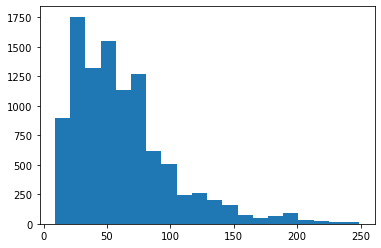

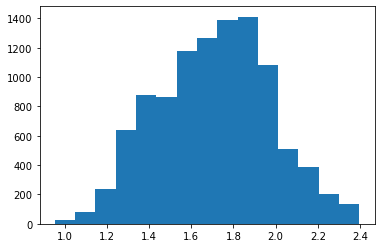

In [92]:
plt.hist(df_train.Price, bins=20)
plt.show()
plt.hist(np.log10(df_train.Price), bins=15)
plt.show()

#como vimos en clase la variable precio está escorada a la izquierda (aunque no muchísimo) y podemos mejorar con ayuda del logaritmo de precio. 
#Pruebo a ver: 

In [93]:
# convierto price a log(Price) y repito proceso:
from sklearn import preprocessing

data = df_train.values
y_train = np.log10(data[:,0:1])     
X_train = data[:,1:]      
feature_names = df_train.columns[1:]
# Escalamos (con los datos SOLO de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

best mean cross-validation score: -0.021
best parameters: {'alpha': 7.56741180992018e-05}


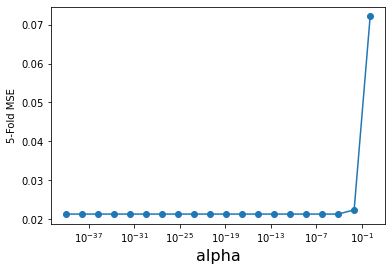

In [94]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
alpha_vector = np.logspace(-40,0.1,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')

plt.show()

In [95]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)
ytrainLasso = lasso.predict(XtrainScaled)
mseTrainModelLasso = mean_squared_error(10**y_train,10**ytrainLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)
    
#no veo que mejore. 
#repaso variables. pruebo a crear nuevas y elimino alguna que guardaba para dejar al modelo decidir por mí. 

MSE Modelo Lasso (train): 587
RMSE Modelo Lasso (train): 24.2
Host Response Rate -0.00721754801249313
Latitude 0.006589044097327346
Longitude 0.0007490108444669706
Accommodates 0.06671768971152252
Bathrooms 0.007034545770905756
Bedrooms 0.030618410411134448
Beds -0.013757552556840896
Security Deposit 0.007955330049277943
Cleaning Fee 0.0226288299626063
Guests Included 0.007851018665473905
Extra People -0.010709821537180428
Minimum Nights -0.0036489179951400214
Maximum Nights -0.0005600323434829042
Availability 365 0.01719555226572475
Number of Reviews -0.021575807647303043
Review Scores Cleanliness 0.014264159901234431
Review Scores Location 0.008709738608474625
Antiguedad 0.008972231840069126
Host_Resp_Time_enc -0.0019352323733570352
Neighbourhood_enc 0.0564927848691554
PropertyType_enc -0.004090780024298604
RoomType_enc 0.12950868190822798
BedType_enc 0.0039172375902454815
CancellationPolicy_enc -0.010730260187060853
Internet -0.0015176914262829211
Smoking_allowed -0.0066830470915031

In [96]:
#Creo variables combinación a partir de sugerencia de kaggle:
df_train['bedrooms_squared'] = df_train['Bedrooms'].apply(lambda x: x**2)
df_train['bed_bath_rooms']   = df_train['Bedrooms']*df_train['Bathrooms']
df_train['lat_plus_long']    = df_train['Latitude']*df_train['Longitude']

#pruebo a bajar el corte de price a 200: 
df_train=df_train[df_train['Price']<200] #estaría aún por encima del valor del IQR
#Elimino Beds: 
df_train=df_train.drop(['Beds'], axis=1)

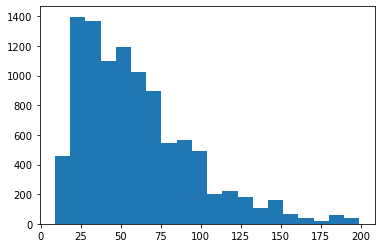

In [97]:
#veo cómo han quedado algunos elementos. 
plt.hist(df_train.Price, bins=20)
plt.show()

In [98]:
df_train.corr()['Price'].sort_values(ascending=False)

Price                        1.000000
Accommodates                 0.641714
RoomType_enc                 0.633184
Cleaning Fee                 0.509001
Bedrooms                     0.459232
Guests Included              0.444060
bed_bath_rooms               0.378614
bedrooms_squared             0.374462
Neighbourhood_enc            0.355712
Security Deposit             0.346825
Total_Amenities              0.236659
Bathrooms                    0.185984
Total_Features               0.175974
CancellationPolicy_enc       0.165164
Extra People                 0.163789
PropertyType_enc             0.147160
Review Scores Location       0.141031
Antiguedad                   0.110065
Review Scores Cleanliness    0.083395
Availability 365             0.077762
Latitude                     0.066403
Internet                     0.044989
average_review               0.034541
Host_Resp_Time_enc           0.034299
BedType_enc                  0.025221
Pets_allowed                 0.010774
Host Respons

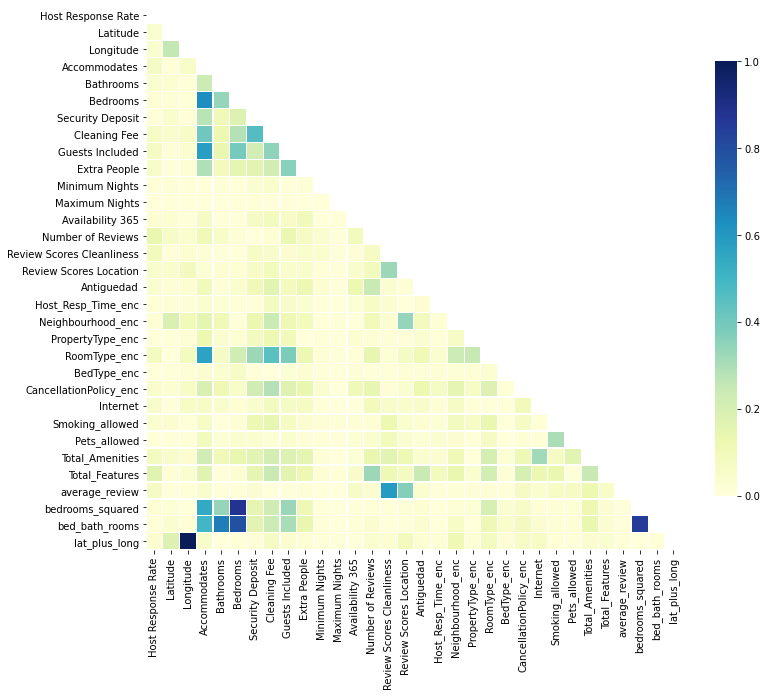

In [99]:
corr = np.abs(df_train.drop(['Price'], axis=1).corr())


mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(12, 10))


sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [100]:
#pruebo a eliminar Longitude
df_train=df_train.drop(['Longitude'], axis=1)


In [101]:
#y pruebo otra vez la selección de características de Lasso: 

In [102]:
data = df_train.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data[:,1:]      # nos quedamos con el resto
feature_names = df_train.columns[1:]
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

best mean cross-validation score: -460.838
best parameters: {'alpha': 0.06011008864405606}


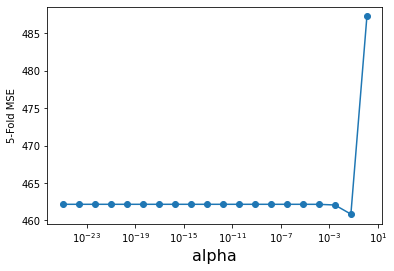

In [103]:
alpha_vector = np.logspace(-25,0.1,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')

plt.show()

In [104]:

alpha_optimo = grid.best_params_['alpha']
#lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)
lasso = Lasso(alpha = 1)
lasso.fit(XtrainScaled,y_train)
ytrainLasso = lasso.predict(XtrainScaled)

mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))


w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)
    
#obtengo valores similares. Error ligeramente mejor (21,4 frente a 24 con un alpha similar 0.06)
#pruebo a no elegir el alpha óptimo sino subirlo un poco (a 1) para que me elimine alguna variable más. 

MSE Modelo Lasso (train): 480
RMSE Modelo Lasso (train): 21.9
Host Response Rate -0.5186275975275552
Latitude 0.0
Accommodates 7.73862263248838
Bathrooms 0.8064544837873995
Bedrooms 4.8567651520688475
Security Deposit 0.8222679689283577
Cleaning Fee 4.384494833327401
Guests Included 1.114387351439174
Extra People -0.0
Minimum Nights -0.0
Maximum Nights -0.0
Availability 365 1.0340085251496343
Number of Reviews -2.124719436616427
Review Scores Cleanliness 1.4464473498767783
Review Scores Location 0.17222580998144435
Antiguedad 0.0
Host_Resp_Time_enc -0.0
Neighbourhood_enc 6.292939035658109
PropertyType_enc 0.0
RoomType_enc 12.140060267687238
BedType_enc 0.0
CancellationPolicy_enc -0.0
Internet 0.0
Smoking_allowed -0.17191299925462314
Pets_allowed -0.0
Total_Amenities 0.5074253220655276
Total_Features 0.0
average_review 0.0
bedrooms_squared -0.0
bed_bath_rooms 0.9148425608592726
lat_plus_long 0.0


In [105]:
df_train.describe()

Price  Host Response Rate      Latitude  Accommodates  \
count  10143.000000        10143.000000  10143.000000  10143.000000   
mean      59.979022           94.837761     40.420405      3.073154   
std       35.690133           14.165281      0.019784      1.780161   
min        9.000000            0.000000     40.332908      1.000000   
25%       31.000000           94.831001     40.409986      2.000000   
50%       50.000000          100.000000     40.418273      2.000000   
75%       80.000000          100.000000     40.427645      4.000000   
max      199.000000          100.000000     40.514247     16.000000   

          Bathrooms      Bedrooms  Security Deposit  Cleaning Fee  \
count  10143.000000  10143.000000      10143.000000  10143.000000   
mean       1.223898      1.249532         77.130139     16.418318   
std        0.551305      0.756712        111.137030     19.856819   
min        0.000000      0.000000          0.000000      0.000000   
25%        1.000000      1.000000          0.000000      0.000000   
50%        1.000000      1.000000          0.000000     10.000000   
75%        1.000000      1.000000        150.000000     30.000000   
max        8.000000     10.000000        990.000000    250.000000   

       Guests Included  Extra People  Minimum Nights  Maximum Nights  \
count     10143.000000  10143.000000    10143.000000    10143.000000   
mean          1.545992      7.353643        3.000000      981.429064   
std           0.985114     10.260387       13.862169    10133.682628   
min           1.000000      0.000000        1.000000        1.000000   
25%           1.000000      0.000000        1.000000      365.000000   
50%           1.000000      5.000000        2.000000     1125.000000   
75%           2.000000     13.000000        3.000000     1125.000000   
max          16.000000    276.000000     1125.000000  1000000.000000   

       Availability 365  Number of Reviews  Review Scores Cleanliness  \
count      10143.000000       10143.000000               10143.000000   
mean         204.627033          23.682145                   9.324827   
std          127.208104          38.861270                   0.886249   
min            0.000000           0.000000                   2.000000   
25%           82.000000           1.000000                   9.000000   
50%          247.000000           8.000000                   9.327430   
75%          320.000000          29.000000                  10.000000   
max          365.000000         356.000000                  10.000000   

       Review Scores Location    Antiguedad  Host_Resp_Time_enc  \
count            10143.000000  10143.000000        10143.000000   
mean                 9.547427      2.704242           67.702869   
std                  0.672363      1.622231            3.010885   
min                  2.000000      0.000000           60.185491   
25%                  9.000000      1.000000           68.055615   
50%                 10.000000      2.000000           68.055615   
75%                 10.000000      4.000000           68.055615   
max                 10.000000      8.000000           73.330144   

       Neighbourhood_enc  PropertyType_enc  RoomType_enc   BedType_enc  \
count       10143.000000      10143.000000  10143.000000  10143.000000   
mean           66.117126         66.617163     66.165541     66.646370   
std            18.796714          6.089670     26.162000      1.728605   
min            18.500000         17.000000     34.242188     44.137931   
25%            55.945455         68.080023     34.242188     66.882382   
50%            67.722915         68.080023     87.603851     66.882382   
75%            80.258842         68.080023     87.603851     66.882382   
max           280.000000        203.750000     87.603851     66.882382   

       CancellationPolicy_enc      Internet  Smoking_allowed  Pets_allowed  \
count            10143.000000  10143.000000     10143.000000  10143.000000   
mean              

In [106]:
#llegados a este punto, continúo avanzando aunque el resultado no parece óptimo, pero he reducido a 16 variables de 89. quizá me he pasado, pero me parece bastante correcto el  número de variables y el error... 
#pruebo con Ridge por si acaso. 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.5s finished


best mean cross-validation score: -461.505
best parameters: {'alpha': 215.44346900318823}


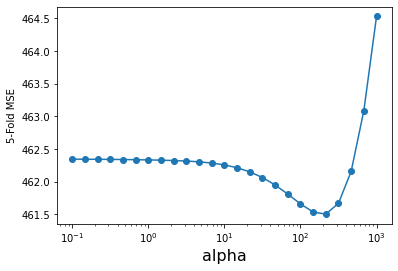

In [107]:
#la curva del alpha en este caso parece más acertada. 
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alpha_vector = np.logspace(-1,3,25)
param_grid = {'alpha': alpha_vector}
grid = GridSearchCV(Ridge(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5, verbose=1)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [108]:
#el valor del MSE es similar al que aparecía en Lasso con el best_param. 
alpha_vector = grid.best_params_['alpha']
ridge = Ridge(alpha = alpha_vector).fit(XtrainScaled,y_train)
w = ridge.coef_
ytrainRidge = ridge.predict(XtrainScaled)

mseTrainModelRidge = mean_squared_error(y_train,ytrainRidge)

print('MSE Modelo Ridge (train): %0.3g' % mseTrainModelRidge)

print('RMSE Modelo Ridge (train): %0.3g' % np.sqrt(mseTrainModelRidge))

for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Ridge (train): 456
RMSE Modelo Ridge (train): 21.4
Host Response Rate [-1.49872311e+00  2.94287502e-01  7.84995714e+00 -6.22426573e-03
  7.86995093e+00  1.25024454e+00  4.14990576e+00  2.19055586e+00
 -1.82713959e+00 -4.63997418e-01 -9.38945336e-02  2.14711648e+00
 -3.47076757e+00  1.90213815e+00  8.31142713e-01  8.50132618e-01
 -1.28767071e-01  6.73394937e+00 -2.55407039e-02  1.26080355e+01
  5.26076753e-01 -8.88537399e-01 -1.77173614e-01 -7.85910096e-01
 -7.89083372e-01  1.50174106e+00  4.10841753e-01  1.09126021e-01
 -6.46140848e+00  5.06849602e+00  1.43541016e-01]


In [109]:
#saco resultados de modelo regresión con Lasso (ya que me ha permitido reducir variables) con el csv.test y valoro probar con random forest si me da tiempo. Si no, lo anoto para v2.  

In [110]:
#cargo los datos de test
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

In [111]:
#realizo la misma transformacion que en train, sin comprobar nada..
df_test=df_test[df_test['City'].str.contains('Mad', na=False, regex=False)]
df_test = df_test[df_test['Room Type'] != 'Shared room']
df_test= df_test.drop(['City','Name', 'Summary','Space','Description','Neighborhood Overview','Notes', 'Transit','Access','Interaction','House Rules','Host Thumbnail Url','Host Picture Url','Host URL','Listing Url','Medium Url','Picture Url','Thumbnail Url','XL Picture Url','ID','Scrape ID','Country Code','Country','Host Acceptance Rate','Jurisdiction Names','Has Availability','Neighbourhood','Last Scraped','Host Name','Host Location','Host About','Host Neighbourhood','Host Verifications','Weekly Price','Monthly Price','Host Listings Count', 'Host ID','Market', 'Smart Location','Zipcode','Experiences Offered','State','Street','Calendar last Scraped','First Review','Last Review', 'Calendar Updated','Calculated host listings count','Host Total Listings Count', 'Reviews per Month' , 'License','Square Feet', 'Geolocation'], axis= 1)
df_test['Host Since'] = pd.to_datetime(df_test['Host Since'])
df_test['Antiguedad']= 2017 - df_test['Host Since'].dt.year
df_test['Antiguedad'].fillna(df_test['Antiguedad'].mean(),inplace= True)
df_test= df_test.drop(['Host Since'],axis=1)
mean_encodeRespTime= df_test.groupby('Host Response Time')['Price'].mean()
df_test.loc[:,'Host_Resp_Time_enc']=df_test['Host Response Time'].map(mean_encodeRespTime)
mean_encodeNeigh= df_test.groupby('Neighbourhood Cleansed')['Price'].mean()
df_test.loc[:,'Neighbourhood_enc']=df_test['Neighbourhood Cleansed'].map(mean_encodeNeigh)
mean_encodeNeighGr= df_test.groupby('Neighbourhood Group Cleansed')['Price'].mean()
df_test.loc[:,'Neighbourhood_Gr_enc']=df_test['Neighbourhood Group Cleansed'].map(mean_encodeNeighGr)
mean_encodePropType= df_test.groupby('Property Type')['Price'].mean()
df_test.loc[:,'PropertyType_enc']=df_test['Property Type'].map(mean_encodePropType)
mean_encodeRoomType= df_test.groupby('Room Type')['Price'].mean()
df_test.loc[:,'RoomType_enc']=df_test['Room Type'].map(mean_encodeRoomType)
mean_encodeBedType= df_test.groupby('Bed Type')['Price'].mean()
df_test.loc[:,'BedType_enc']=df_test['Bed Type'].map(mean_encodeBedType)
mean_encodeCancPol= df_test.groupby('Cancellation Policy')['Price'].mean()
df_test.loc[:,'CancellationPolicy_enc']=df_test['Cancellation Policy'].map(mean_encodeCancPol)
df_test= df_test.drop(['Host Response Time','Neighbourhood Cleansed','Neighbourhood Group Cleansed','Property Type','Room Type','Bed Type','Cancellation Policy'],axis=1)
df_test['Internet'] = df_test['Amenities'].str.extract(r'(Internet)')
df_test['Internet'].fillna(0,inplace=True)
df_test['Internet']=df_test['Internet'].apply(lambda x: 1 if x!=0 else 0)
df_test['Smoking_allowed'] = df_test['Amenities'].str.extract(r'(Smoking allowed)')
df_test['Smoking_allowed'].fillna(0,inplace=True)
df_test['Smoking_allowed']=df_test['Smoking_allowed'].apply(lambda x: 1 if x!=0 else 0)
df_test['Pets_allowed'] = df_test['Amenities'].str.extract(r'(Pets allowed)')
df_test['Pets_allowed'].fillna(0,inplace=True)
df_test['Pets_allowed']=df_test['Pets_allowed'].apply(lambda x: 1 if x!=0 else 0)
df_test['Total_Amenities'] = df_test['Amenities'].apply(lambda x: len(str(x).split(',')))
df_test['Total_Features'] = df_test['Features'].apply(lambda x: len(str(x).split(',')))
df_test= df_test.drop(['Amenities', 'Features'],axis=1)
df_test= df_test.drop(['Availability 30','Availability 60','Availability 90','Neighbourhood_Gr_enc'],axis=1)
df_test['average_review'] = df_test[['Review Scores Rating','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value']].mean(axis=1)
df_test= df_test.drop(['Review Scores Rating','Review Scores Accuracy','Review Scores Checkin','Review Scores Communication','Review Scores Value'],axis=1)
df_test['Security Deposit'].fillna(0,inplace=True)
df_test['Cleaning Fee'].fillna(0,inplace=True)
df_test['Beds'].fillna(df_test['Beds'].mode()[0], inplace= True)
df_test['Bathrooms'].fillna(df_test['Bathrooms'].mode()[0], inplace= True)
df_test['Bedrooms'].fillna(df_test['Bedrooms'].mode()[0], inplace= True)
df_test.fillna(df_test.mean(), inplace= True)
df_test=df_test[df_test['Price']<200]
col = df_test.pop("Price")
df_test.insert(0, col.name, col)
df_test['bedrooms_squared'] = df_test['Bedrooms'].apply(lambda x: x**2)
df_test['bed_bath_rooms']   = df_test['Bedrooms']*df_test['Bathrooms']
df_test['lat_plus_long']    = df_test['Latitude']*df_test['Longitude']
df_test=df_test.drop(['Beds','Longitude'], axis=1)

In [112]:
# preparo los datos para el modelo
data_t = df_test.values

y_test = data_t[:,0:1]    
X_test = data_t[:,1:]     

feature_names_t = df_test.columns[1:]

XtestScaled = scaler.transform(X_test) 


In [113]:
alpha_optimo = grid.best_params_['alpha']
#lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)
lasso = Lasso(alpha = 1)
lasso.fit(XtrainScaled,y_train)
ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

print('coeficiente de determinación R2 de la predicción en train: ', lasso.score(XtrainScaled,y_train))
print('coeficiente de determinación R2 de la predicción en test: ', lasso.score(XtestScaled,y_test))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 480
MSE Modelo Lasso (test) : 467
RMSE Modelo Lasso (train): 21.9
RMSE Modelo Lasso (test) : 21.6
coeficiente de determinación R2 de la predicción en train:  0.6230991485257329
coeficiente de determinación R2 de la predicción en test:  0.6279328008732348
Host Response Rate -0.5186275975275552
Latitude 0.0
Accommodates 7.73862263248838
Bathrooms 0.8064544837873995
Bedrooms 4.8567651520688475
Security Deposit 0.8222679689283577
Cleaning Fee 4.384494833327401
Guests Included 1.114387351439174
Extra People -0.0
Minimum Nights -0.0
Maximum Nights -0.0
Availability 365 1.0340085251496343
Number of Reviews -2.124719436616427
Review Scores Cleanliness 1.4464473498767783
Review Scores Location 0.17222580998144435
Antiguedad 0.0
Host_Resp_Time_enc -0.0
Neighbourhood_enc 6.292939035658109
PropertyType_enc 0.0
RoomType_enc 12.140060267687238
BedType_enc 0.0
CancellationPolicy_enc -0.0
Internet 0.0
Smoking_allowed -0.17191299925462314
Pets_allowed -0.0
Total_Amenities 0.50

In [114]:
#Los resultados de test me parecen muy similares a train..ligeramente más bajos...igual me he pasado recortando variables.
 
#Me parece un resultado bastante aceptable (sin tener en cuenta el score, que lo he calculado en el último momento..) . 
#Con respecto a las pruebas anteriores, el error ha aumentado poco, el modelo es más sencillo y su interpretabilidad mejora. 

#A lo largo del notebook he ido anotando opciones que dejo para una V2, a la que no he llegado esta vez. 
#no sigo modificando variables, este podría ser un final para la práctica. 

#------------------------------------------------




In [115]:
df_test.describe()


Price  Host Response Rate     Latitude  Accommodates  \
count  2527.000000         2527.000000  2527.000000   2527.000000   
mean     58.824485           94.961759    40.420984      3.083894   
std      35.426404           13.809370     0.020832      1.765130   
min       9.000000            0.000000    40.332953      1.000000   
25%      30.000000           94.827753    40.409904      2.000000   
50%      50.000000          100.000000    40.419026      2.000000   
75%      75.000000          100.000000    40.428170      4.000000   
max     199.000000          100.000000    40.513673     16.000000   

         Bathrooms     Bedrooms  Security Deposit  Cleaning Fee  \
count  2527.000000  2527.000000       2527.000000   2527.000000   
mean      1.202612     1.247725         73.290859     15.421448   
std       0.503654     0.708763        107.997018     18.087674   
min       0.000000     0.000000          0.000000      0.000000   
25%       1.000000     1.000000          0.000000      0.000000   
50%       1.000000     1.000000          0.000000     10.000000   
75%       1.000000     1.000000        150.000000     25.000000   
max       6.000000     6.000000        900.000000    140.000000   

       Guests Included  Extra People  Minimum Nights  Maximum Nights  \
count      2527.000000   2527.000000     2527.000000     2527.000000   
mean          1.566680      7.312228        2.759003      886.246933   
std           1.041596     11.296035        5.670562     2043.124591   
min           1.000000      0.000000        1.000000        1.000000   
25%           1.000000      0.000000        1.000000      365.000000   
50%           1.000000      0.000000        2.000000     1125.000000   
75%           2.000000     13.000000        3.000000     1125.000000   
max          15.000000    271.000000      185.000000   100000.000000   

       Availability 365  Number of Reviews  Review Scores Cleanliness  \
count       2527.000000        2527.000000                2527.000000   
mean         203.117531          23.597942                   9.348601   
std          126.420778          39.584558                   0.840215   
min            0.000000           0.000000                   2.000000   
25%           81.000000           1.000000                   9.000000   
50%          238.000000           8.000000                   9.352085   
75%          320.000000          28.000000                  10.000000   
max          365.000000         446.000000                  10.000000   

       Review Scores Location   Antiguedad  Host_Resp_Time_enc  \
count             2527.000000  2527.000000         2527.000000   
mean                 9.532668     2.675109           66.666573   
std                  0.706458     1.634479            2.802718   
min                  2.000000     0.000000           59.291228   
25%                  9.000000     1.000000           67.484791   
50%                 10.000000     2.000000           67.579473   
75%                 10.000000     4.000000           67.579473   
max                 10.000000     7.000000           74.581818   

       Neighbourhood_enc  PropertyType_enc  RoomType_enc  BedType_enc  \
count        2527.000000       2527.000000   2527.000000  2527.000000   
mean           64.817278         65.432073     65.034244    65.464808   
std            21.306350          6.932481     25.425552     2.322431   
min            10.000000         15.000000     34.186227    35.000000   
25%            51.166667         67.865602     34.186227    65.797801   
50%            68.270903         67.865602     85.982200    65.797801   
75%            82.232323         67.865602     85.982200    65.797801   
max           447.500000        125.000000     85.982200    65.797801   

       CancellationPolicy_enc     Internet  Smoking_allowed  Pets_allowed  \
count             2527.000000  2527.000000      2527.000000   2527.000000   
mean                65.410100     0.949347         0.269094      0.185991

In [116]:
#Empiezo por probar con arbol de decisión ya que en clase no vimos un ejemplo de árbol de regresión con datos reales y me apetece probar.
#soy consciente de que se comentó en clase que no se suele usar en la vida real a no ser que importe menos la precisión que la interpretabilidad.

In [117]:
#preparo datos para arbol de decisión, no escalo porque no es necesario para este modelo. 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

data = df_train.values
y_train1 = data[:,0:1]     
X_train1 = data[:,1:]      
feature_names = df_train.columns[1:]


best mean cross-validation score: -464.727
best parameters: {'max_depth': 7}


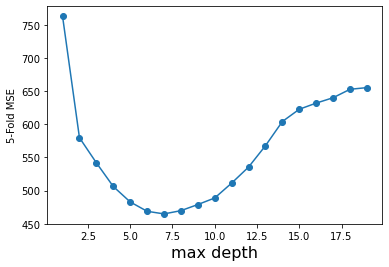

In [118]:
max_depth_vector = list(range(1, 20))
param_grid = {'max_depth': max_depth_vector}
grid = GridSearchCV(DecisionTreeRegressor(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(X_train1, y_train1)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.plot(max_depth_vector,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [119]:
regTree = DecisionTreeRegressor(max_depth=7)
regTree.fit(X_train1,y_train1)

y_test_predicted = regTree.predict(X_test)


error_test = mean_absolute_error(y_test_predicted, y_test)
print('MSE test:%.2f'%error_test)

print("coeficiente de determinación R2 de la predicción,train: ",regTree.score(X_train,y_train))
print('coeficiente de determinación R2 de la predicción,test: ', regTree.score(X_test,y_test))



MSE test:14.69
coeficiente de determinación R2 de la predicción,train:  0.7117220994077257
coeficiente de determinación R2 de la predicción,test:  0.6473666484475945


In [120]:
#los resultados considero que no son malos. 
#pruebo a representar gráficamente el árbol y paso a la siguiente opción a practicar, random forest. 


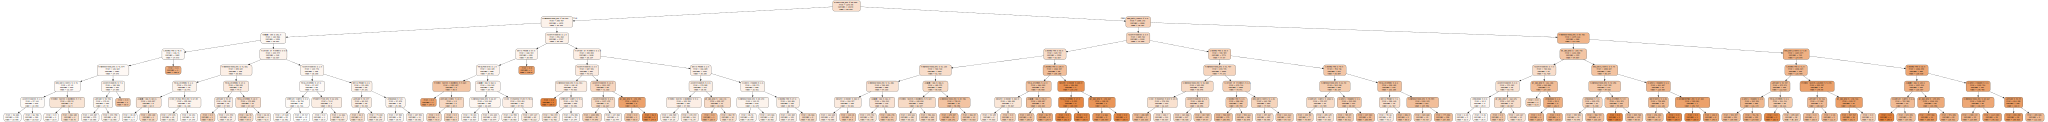

In [121]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(regTree, out_file=None, max_depth= 8,
                         feature_names=feature_names,
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data) 

graph

#aunque no consigo reducir el tamaño del gráfico, me parece bastante chulo. 

[Text(1282.9017857142856, 2491.5, 'RoomType_enc <= 60.923\nmse = 1273.66\nsamples = 10143\nvalue = 59.979'),
 Text(572.9464285714286, 2038.5, 'Neighbourhood_enc <= 50.621\nmse = 268.467\nsamples = 4075\nvalue = 32.404'),
 Text(274.0178571428571, 1585.5, 'Availability 365 <= 361.5\nmse = 160.966\nsamples = 1328\nvalue = 26.037'),
 Text(149.46428571428572, 1132.5, 'Cleaning Fee <= 45.0\nmse = 136.71\nsamples = 1082\nvalue = 24.673'),
 Text(99.64285714285714, 679.5, 'Neighbourhood_enc <= 41.674\nmse = 126.564\nsamples = 1081\nvalue = 24.575'),
 Text(49.82142857142857, 226.5, '\n  (...)  \n'),
 Text(149.46428571428572, 226.5, '\n  (...)  \n'),
 Text(199.28571428571428, 679.5, 'mse = 0.0\nsamples = 1\nvalue = 130.0'),
 Text(398.57142857142856, 1132.5, 'Number of Reviews <= 0.5\nmse = 223.474\nsamples = 246\nvalue = 32.037'),
 Text(298.92857142857144, 679.5, 'Neighbourhood_enc <= 41.831\nmse = 309.534\nsamples = 108\nvalue = 36.852'),
 Text(249.10714285714283, 226.5, '\n  (...)  \n'),
 Text(

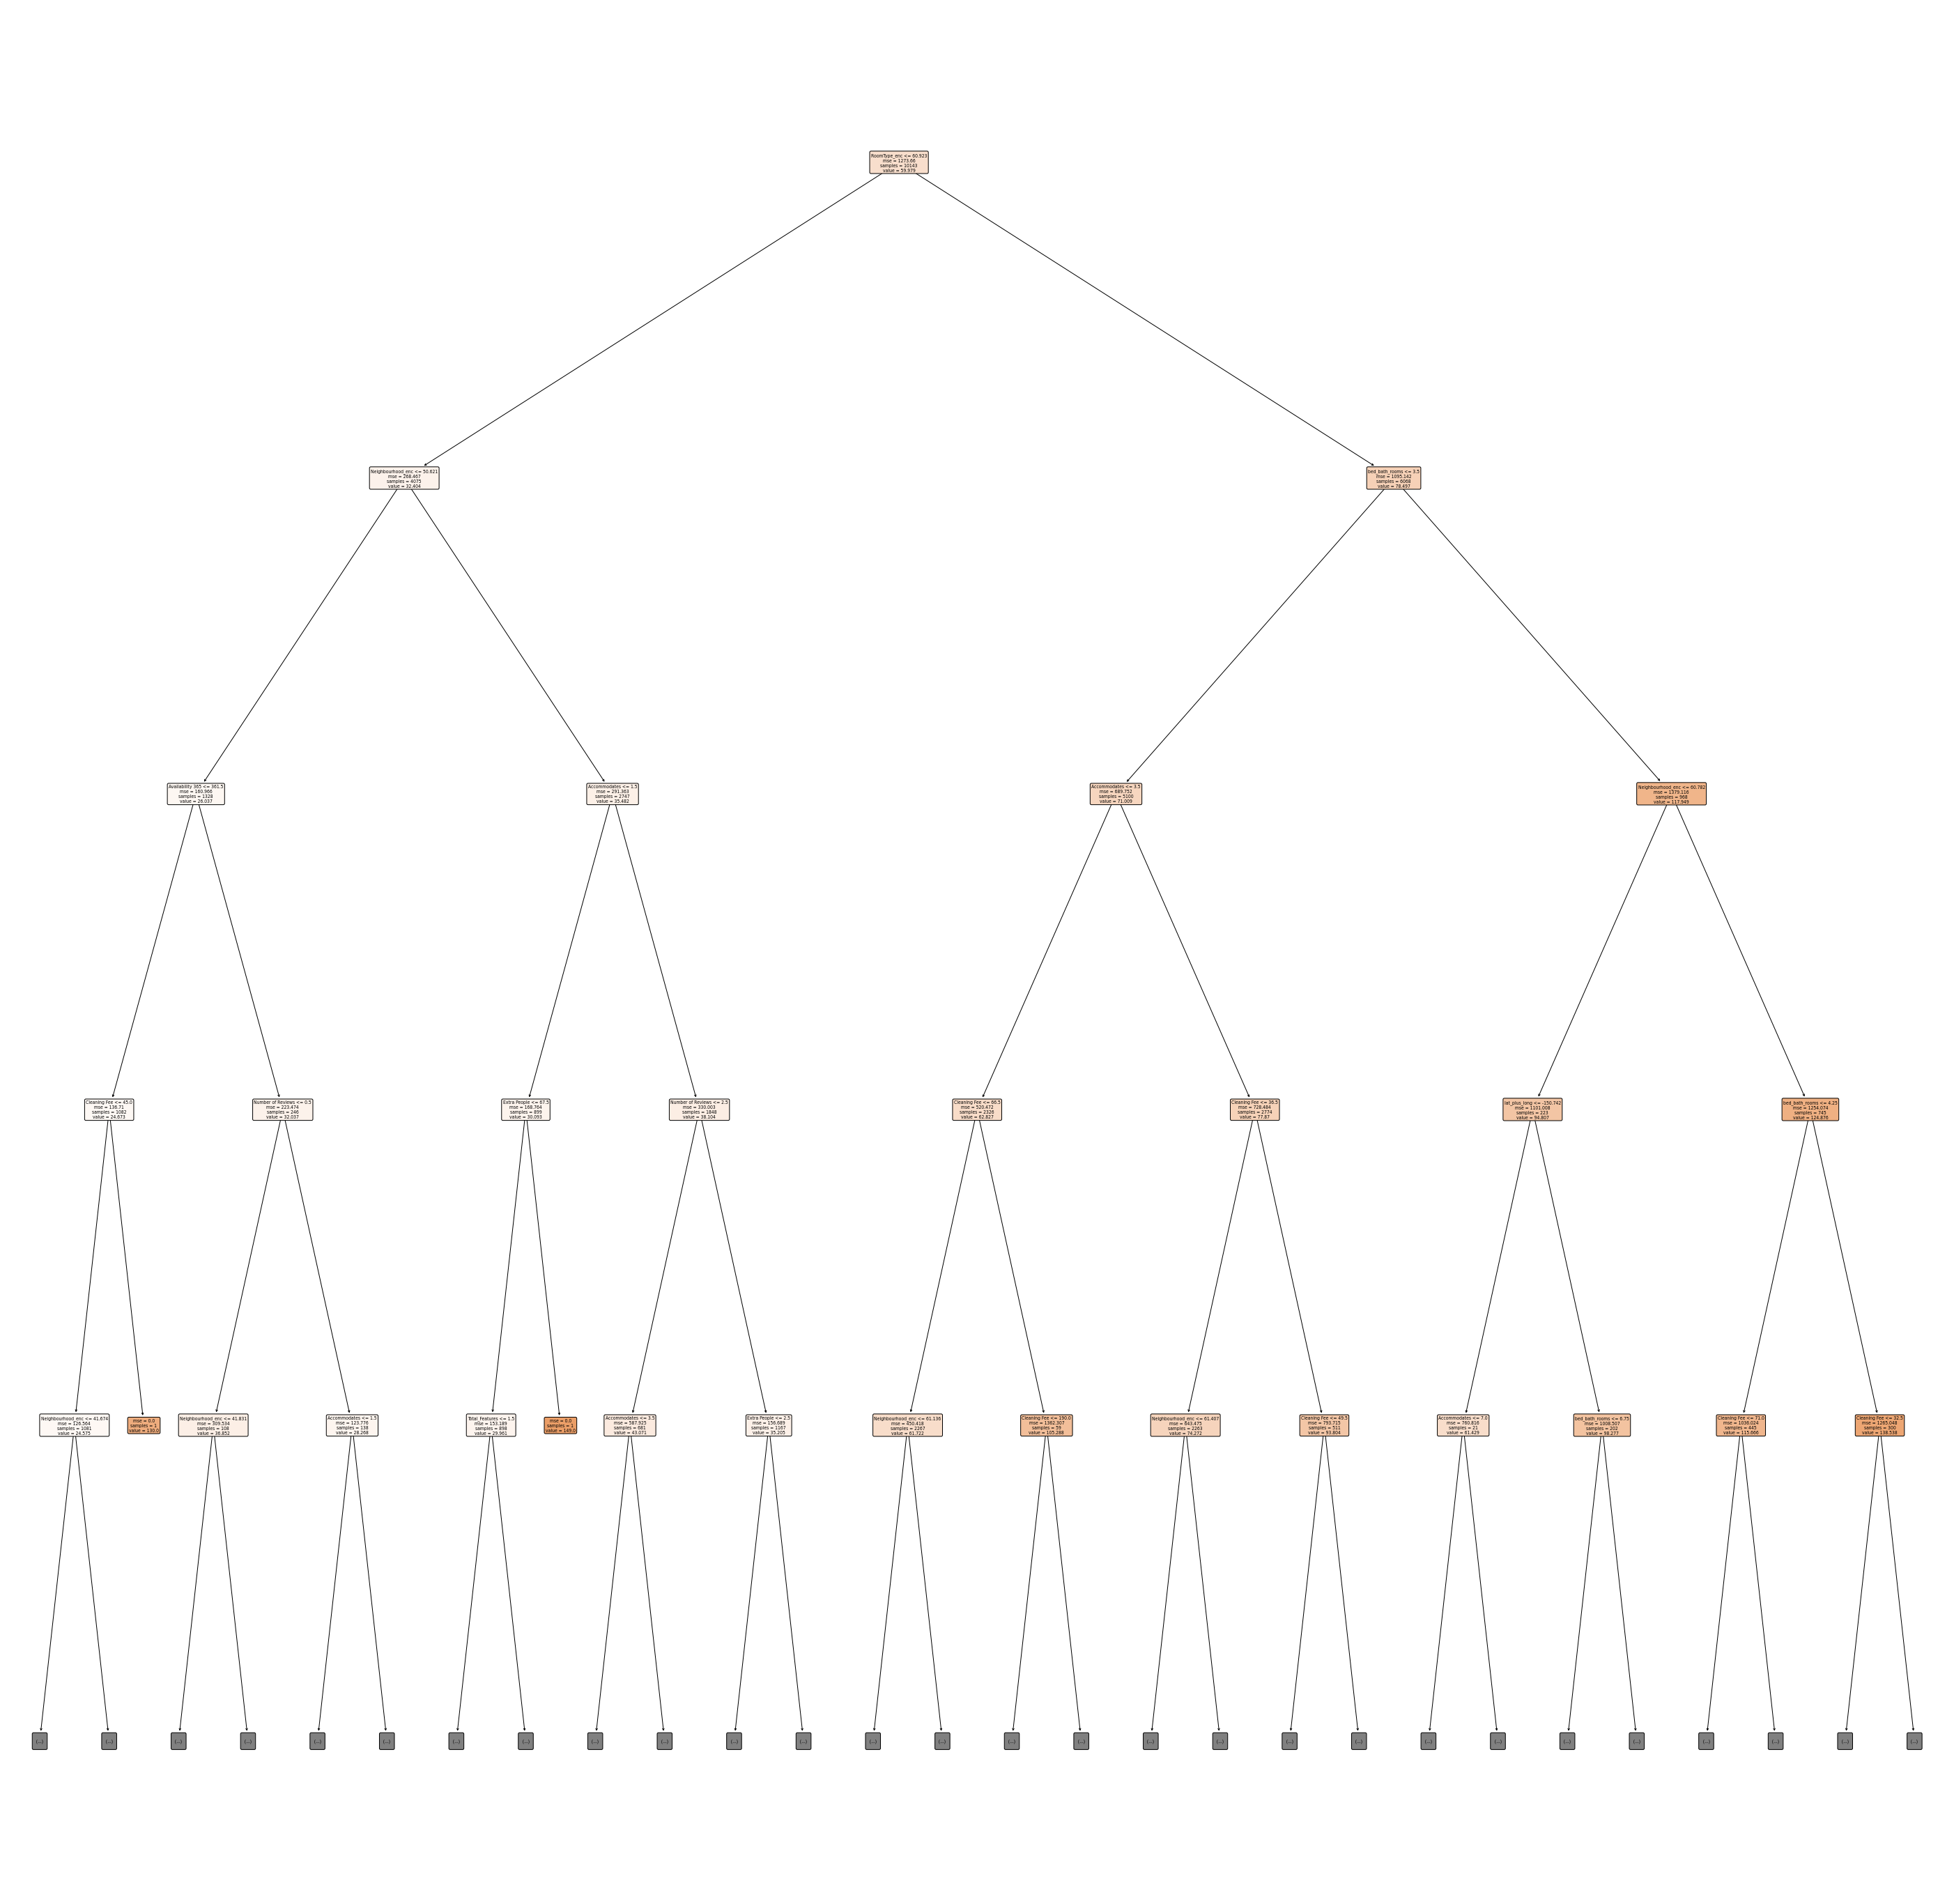

In [123]:
plt.figure(figsize=(50, 50))
tree.plot_tree(regTree, feature_names= feature_names,filled=True, max_depth= 4,rounded=True)

#con la opción sklearn en cambio me queda pequeño, puedo abrir la imagen en pestaña nueva y verla mejor...investigar en v2!

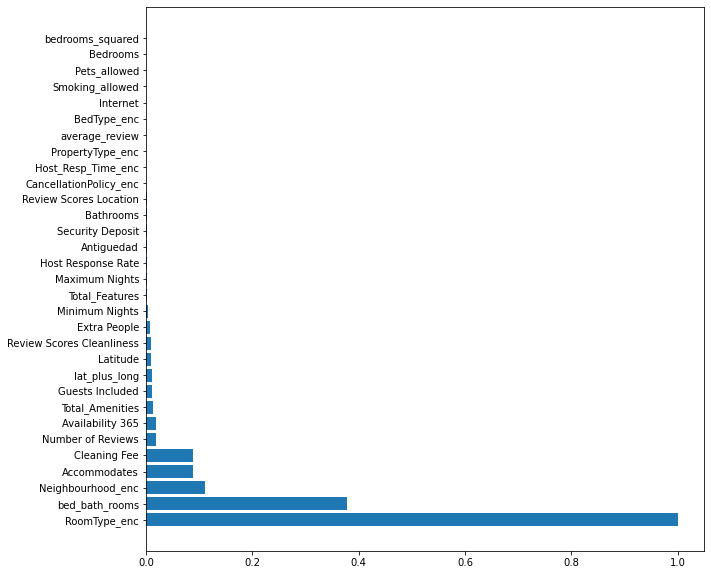

In [124]:
importances = regTree.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

#esta clasificación no es determinante al haber sido hecha sobre un sólo arbol

In [ ]:
#Por cuestiones de prestaciones, se recomienda probar random forest directamente. Pruebo 

In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

data = df_train.values
y_train = data[:,0:1]     
X_train = data[:,1:]      
feature_names = df_train.columns[1:]



best mean cross-validation score: 0.744
best parameters: {'max_depth': 27}


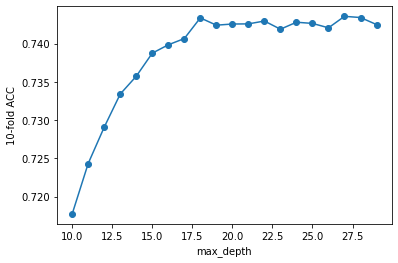

In [126]:
maxDepth = range(10,30) #he ido variando para localizar cuando cambia la profundidad y me quedo con 18 aunque me recomiende 27 
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), 
                    param_grid=tuned_parameters,cv=5) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [127]:
randforest = RandomForestRegressor(max_depth=18)
randforest.fit(X_train,y_train)

y_test_predicted = randforest.predict(X_test)


error_test = mean_absolute_error(y_test_predicted, y_test)
print('MSE test:%.2f'%error_test)

print("coeficiente de determinación R2 de la predicción,train: ",randforest.score(X_train,y_train))
print('coeficiente de determinación R2 de la predicción,test: ', randforest.score(X_test,y_test))

MSE test:12.19
coeficiente de determinación R2 de la predicción,train:  0.9572099161137244
coeficiente de determinación R2 de la predicción,test:  0.7536022308677703


In [ ]:
#los valores me salen muy buenos, debería probar variando los valores de los estimadores y no tengo claro que no me haya equivocado en algo (he hecho mucho corta pega)...revisaría. 
#saco en cualquier caso la importancia de las variables.  

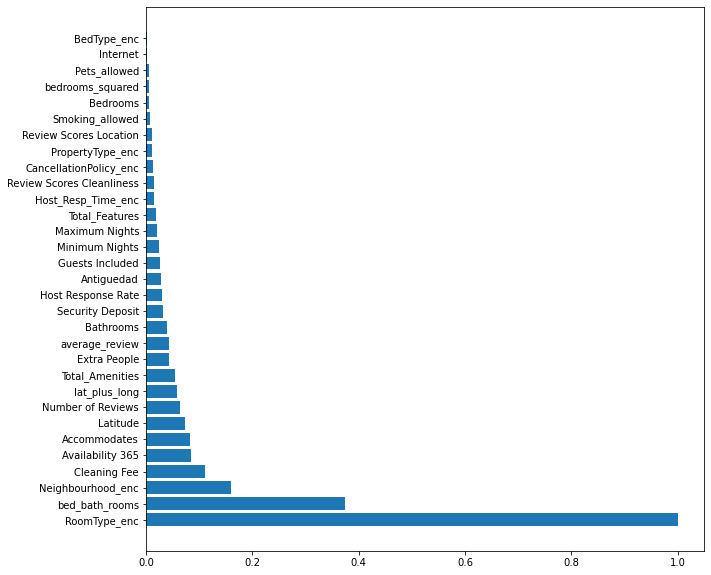

In [128]:
importances = randforest.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()
#la gráfica es similar a la del arbol de decisión, dando más importancia a más variables que en el otro modelo. 

In [ ]:
#En general, cada modelo diría que tiene sus ventajas y sus desventajas. 
#De Lasso me gusta la simplificación de las variables, del árbol de decisión la visualización, y del random forest el resultado del score y del error..
#yo seguiría quitando y probando hasta el infinito, pero para una aproximación al machine learning creo que no está mal. 